# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Шаг 1. Общая информация

In [1]:
from pymystem3 import Mystem
m = Mystem()
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Названия столбцов пригодны для дальнейшей обработки. Чуть менее чем в половине объявлений не указана высота потолка. Есть пропуски в полях "Этажность" и "Этаж", их нужно будет изучить, возможно, это частные дома. 
Также есть пропуски в поле "Жилая площадь", это важная характеристика квартир. 
Пропуски в поле "Площадь кухни", предположительно, относятся к квартирам студийного типа.
Судя по всему, примерно в половине квартир нет балконов, но нужно будет проверить этажность.
Пропуски в поле "Населенный пункт" сразу вызывают вопросы.
Пропуски в полях "Ближайший аэропорт", "Ближайшие парки", "Водоемы", предположительно, объясняются серьезной удаленностью от подобных объектов.
Пропуски в поле "days_exposition" говорят о том, что объявление не закрыто. 

### Шаг 2. Предобработка данных

In [4]:
percent_missing = df.isnull().sum()*100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
total_images,total_images,0.000000
last_price,last_price,0.000000
total_area,total_area,0.000000
first_day_exposition,first_day_exposition,0.000000
rooms,rooms,0.000000
ceiling_height,ceiling_height,38.799105
floors_total,floors_total,0.362885
living_area,living_area,8.029875
floor,floor,0.000000
is_apartment,is_apartment,88.290645


In [5]:
df[df['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,False,False,7.00,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,False,False,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,False,False,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,False,False,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Три с лишним тысячи объявлений не закрыты. Заполнять такие пропуски, скорее всего, бессмысленно. Пока оставим, в случае чего вернемся. 

In [6]:
df[df['days_exposition'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [7]:
df['days_exposition'] = df['days_exposition'].fillna(value=0)
df['days_exposition'] = df['days_exposition'].astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


Запомним, что в столбце "Длительность экспозиции" нули означают, что объявление не снято с публикации. Судя по всему, столбцы, демонстрирующие наличие поблизости парков и водоемов, не рассматриваются в контексте задачи как влияющие на параметры продажи недвижимости. Создадим новый вариант таблицы без них. Если впоследствии они понадобятся, вернем их.

In [8]:
_df = df.copy()
df = df[['total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'days_exposition']]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,81
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,558
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,424
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,121


In [9]:
df[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,False,False,8.80,0.0,NaN,23478.0,4258.0,147
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,False,False,18.60,0.0,NaN,NaN,NaN,34
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,False,False,10.70,0.0,NaN,22041.0,17369.0,276
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,False,False,8.20,0.0,NaN,22041.0,17369.0,256
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,False,False,6.50,0.0,NaN,27419.0,8127.0,45
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,False,False,13.38,0.0,NaN,25054.0,3902.0,869
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,223
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,False,False,NaN,0.0,NaN,26534.0,5382.0,350
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,303
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,False,False,NaN,0.0,NaN,21460.0,16788.0,49


В 49 объявлениях не указан населенный пункт. Вероятно, его можно вычислить по расстоянию от центра города и аэропорта. Такие объявления висят довольно долго, за исключением считанных случаев. Пока все упирается в населенные пункты - в этом столбце надо навести порядок. 

In [10]:
df['locality_name'] = df['locality_name'].fillna(value='Неизвестно')

In [11]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [12]:
len(df['locality_name'].unique())

365

Явно мешают служебные слова типа "деревня", "поселок", их лучше сразу убрать. Также все ё заменить на е.

In [13]:
def replace_name(i):
    name = i.replace('ё', 'е')
    if 'городской поселок' in name:
        new_name = name.replace('городской поселок ', '')
        return new_name
    elif 'поселок городского типа' in name:
        new_name = name.replace('поселок городского типа ', '')
        return new_name
    elif 'коттеджный поселок' in name:
        new_name = name.replace('коттеджный поселок ', '')
        return new_name
    elif 'поселок при железнодорожной станции' in name:
        new_name = name.replace('поселок при железнодорожной станции ', '')
        return new_name
    elif 'поселок станции' in name:
        new_name = name.replace('поселок станции ', '')
        return new_name
    elif 'поселок' in name:
        new_name = name.replace('поселок ', '')
        return new_name
    elif 'село' in name:
        new_name = name.replace('село ', '')
        return new_name
    elif 'деревня' in name:
        new_name = name.replace('деревня ', '')
        return new_name
    elif 'садоводческое некоммерческое товарищество' in name:
        new_name = name.replace('садоводческое некоммерческое товарищество ', '')
        return new_name
    elif 'садовое товарищество' in name:
        new_name = name.replace('садовое товарищество ', '')
        return new_name
    return name

In [14]:
df['clean_name'] = df['locality_name'].apply(replace_name)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,days_exposition,clean_name
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,0,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,81,Шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,558,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,424,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,121,Санкт-Петербург


In [15]:
df['clean_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [16]:
len(df['clean_name'].unique())

306

In [17]:
df = df[['total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'clean_name', 'airports_nearest', 'cityCenters_nearest', 'days_exposition']]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,clean_name,airports_nearest,cityCenters_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,Шушары,12817.0,18603.0,81
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,558
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,424
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,121


In [18]:
df.duplicated().sum()

0

In [19]:
df[df['clean_name'] == 'Неизвестно'].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition
count,49.000000,4.900000e+01,49.000000,49.000000,14.000000,48.000000,44.000000,49.000000,40.000000,43.000000,41.000000,41.000000,49.000000
mean,8.000000,6.745167e+06,69.799796,2.326531,2.990714,9.666667,39.152727,5.448980,12.389500,0.325581,24572.341463,11278.902439,233.775510
std,5.552777,4.496722e+06,30.575956,0.944011,0.386870,7.677913,17.694664,5.784538,7.497993,0.747087,8461.691597,8910.058254,191.680644
min,0.000000,1.750000e+06,29.400000,1.000000,2.600000,2.000000,13.000000,1.000000,5.000000,0.000000,10556.000000,1322.000000,0.000000
25%,3.000000,3.950000e+06,46.500000,2.000000,2.750000,5.000000,27.550000,2.000000,8.200000,0.000000,21654.000000,4383.000000,78.000000
50%,7.000000,5.130593e+06,63.000000,2.000000,2.875000,6.000000,35.900000,3.000000,10.200000,0.000000,22041.000000,8943.000000,209.000000
75%,10.000000,8.000000e+06,83.000000,3.000000,3.090000,11.250000,51.100000,6.000000,12.250000,0.000000,25771.000000,17369.000000,325.000000
max,20.000000,2.400000e+07,178.300000,4.000000,4.000000,24.000000,94.000000,23.000000,41.600000,4.000000,60195.000000,41294.000000,869.000000


Наверняка можно по имеющимся параметрам "вычислить" пропущенные населенные пункты, но пока я не готов утверждать, что получатся достоверные данные. Оставим пока группу "Неизвестно", поскольку нам могут пригодиться данные из других столбцов этой выборки.

In [20]:
df[df['cityCenters_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,clean_name,airports_nearest,cityCenters_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,Янино-1,NaN,NaN,55
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,Мурино,NaN,NaN,189
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,90
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,False,False,11.00,2.0,Кудрово,NaN,NaN,60
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,NaN,False,False,5.50,NaN,Дзержинского,NaN,NaN,0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,413
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,45
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,False,False,NaN,NaN,Рождествено,NaN,NaN,0


Вот здесь интересно. Посмотрим, есть ли пропуски в названиях населенных пунктов, если не указано расстояние до центра. Сделать это можно, обратившись к исходной таблице.

In [21]:
_df[_df['cityCenters_nearest'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5519 entries, 5 to 23698
Data columns (total 22 columns):
total_images            5519 non-null int64
last_price              5519 non-null float64
total_area              5519 non-null float64
first_day_exposition    5519 non-null object
rooms                   5519 non-null int64
ceiling_height          2944 non-null float64
floors_total            5509 non-null float64
living_area             4896 non-null float64
floor                   5519 non-null int64
is_apartment            628 non-null object
studio                  5519 non-null bool
open_plan               5519 non-null bool
kitchen_area            4804 non-null float64
balcony                 2809 non-null float64
locality_name           5511 non-null object
airports_nearest        1 non-null float64
cityCenters_nearest     0 non-null float64
parks_around3000        1 non-null float64
parks_nearest           1 non-null float64
ponds_around3000        1 non-null float64
pon

Итак, расстояние до центра города не указано в 5519 случаях, из них наименование населенного пункта пропущено всего в восьми. Кроме того, и других "расстояний" тоже почти нет. Это означает, что можно заполнить эти столбцы реальными данными, обратившись к строкам, для которых указан и населенный пункт, и соответствующая дистанция.

In [22]:
distance_pivot = df.pivot_table(index='clean_name', values='cityCenters_nearest', aggfunc='median')
distance_pivot

,cityCenters_nearest
clean_name,
Александровская,27468.0
Белоостров,38868.0
Зеленогорск,53381.0
Колпино,32018.0
Красное Село,29140.5
Кронштадт,49575.0
Левашово,25727.0
Лисий Нос,28226.0
Ломоносов,51677.0


In [23]:
len(distance_pivot)

28

У нас 306 уникальных наименований населенных пунктов, а расстояния до центра указаны для 28. 278 населенных пунктов лишены такой информации. Наверняка эта информация добавляется в таблицу автоматически, значит, где-то произошел сбой. В этом случае нужно вернуть данные на доработку - очевидно, что пропуски именно по этим колонкам и в практически одинаковых количествах не могут быть случайными. 

In [24]:
df['balcony'].isna().sum()

11519

Очевидно, что пропуски в колонке "Балкон" означают, что балконов в квартире нет. Заменяем нулями.

In [25]:
df['balcony'] = df['balcony'].fillna(value=0)
df['balcony'].isna().sum()

0

In [26]:
df['is_apartment'].isna().sum()

20924

In [27]:
df[df['is_apartment'] == True]['clean_name'].count()

50

Понятно, что в столбце "Апартаменты" значения появляются по принципу галочки - если недвижимость является апартаментами, пользователь ставит галочку, если нет - пропускает это поле. Исходя из предположения, что пользователи не солгали, заменим в этом столбце Nan на False.

In [28]:
df['is_apartment'] = df['is_apartment'].replace('True', True)

In [29]:
df['is_apartment'] = df['is_apartment'].replace('False', False)

In [30]:
df['is_apartment'] = df['is_apartment'].fillna(value = False)

In [31]:
df[df['is_apartment'] == True]['clean_name'].count()

50

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 18 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
clean_name              23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
days_exposition         23699 non-null int64
dtypes: bool(3), float64(9), int64(4), object(2)
memory usage: 2

Число значений True в столбце "Апартаменты" не изменилось, а вот тип данных стал bool.

In [33]:
df['kitchen_area'].isnull().sum()

2278

In [34]:
df['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [35]:
df_studio = df[(df['kitchen_area'].isnull()) & (df['studio'] == True)]
len(df_studio)

149

В 149 случаях, когда квартира является студией, площадь кухни не указана. Это логично. Теперь глянем, сколько в этой выборке нулевых значений в столбце "Кол-во комнат". 

In [36]:
df_studio.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,clean_name,airports_nearest,cityCenters_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,False,True,False,NaN,2.0,Мурино,NaN,NaN,181
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,64
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,False,True,False,NaN,0.0,Шушары,NaN,NaN,29
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,True,False,NaN,0.0,Кудрово,NaN,NaN,201
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,True,False,NaN,0.0,Шушары,18654.0,29846.0,40


In [37]:
df_studio[df_studio['rooms'] != 0].count()

total_images            11
last_price              11
total_area              11
first_day_exposition    11
rooms                   11
ceiling_height           5
floors_total            11
living_area             11
floor                   11
is_apartment            11
studio                  11
open_plan               11
kitchen_area             0
balcony                 11
clean_name              11
airports_nearest         5
cityCenters_nearest      5
days_exposition         11
dtype: int64

В 11 случаях указано количество комнат

In [38]:
df_studio[df_studio['rooms'] != 0].sum()

total_images                                                           63
last_price                                                     3.0699e+07
total_area                                                         301.31
first_day_exposition    2016-06-07T00:00:002016-05-17T00:00:002016-04-...
rooms                                                                  11
ceiling_height                                                       13.7
floors_total                                                          173
living_area                                                        210.22
floor                                                                  93
is_apartment                                                        False
studio                                                                 11
open_plan                                                           False
kitchen_area                                                            0
balcony                               

Ровно по одной комнате, что тоже логично. Если говорить о заполнении пропусков, то логично установить "1" в столбце "Число комнат", если тип квартиры - студия. 

In [39]:
df[df['rooms'] == 0].count()

total_images            197
last_price              197
total_area              197
first_day_exposition    197
rooms                   197
ceiling_height           82
floors_total            194
living_area             183
floor                   197
is_apartment            197
studio                  197
open_plan               197
kitchen_area              0
balcony                 197
clean_name              197
airports_nearest        118
cityCenters_nearest     118
days_exposition         197
dtype: int64

In [40]:
def studio_room(row):
    if row['studio'] == True:
        row['rooms'] = 1
    return row['rooms']

In [41]:
df['rooms'] = df.apply(studio_room, axis = 1)

In [42]:
df[df['rooms'] == 0].count()

total_images            59
last_price              59
total_area              59
first_day_exposition    59
rooms                   59
ceiling_height          10
floors_total            59
living_area             55
floor                   59
is_apartment            59
studio                  59
open_plan               59
kitchen_area             0
balcony                 59
clean_name              59
airports_nearest        31
cityCenters_nearest     31
days_exposition         59
dtype: int64

Неплохо, уменьшили число пропусков со 197 до 59, более чем втрое. Оставшиеся 59 случаев - это квартиры с открытой планировкой

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 18 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
clean_name              23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
days_exposition         23699 non-null int64
dtypes: bool(3), float64(9), int64(4), object(2)
memory usage: 2

Осталось довольно много пропусков в столбце "Высота потолка", 39%. Так как в контексте задачи не предполагается изучение зависимости цены квартиры от высоты потолка, лучше не заполнять эти пропуски, поскольку это точно исказит выборку, к тому же непредсказуемым образом. Теоретически можно категоризировать этажность здания и взять медианные высоты потолков по категорям.

In [44]:
df['floors_total'].isna().sum()

86

In [45]:
df[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,clean_name,airports_nearest,cityCenters_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,False,False,False,12.00,0.0,Санкт-Петербург,39197.0,12373.0,49
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,False,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,251
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,False,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,727
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,False,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,123
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,False,False,False,NaN,0.0,Санкт-Петербург,51340.0,15363.0,512
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,False,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,127
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,False,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,260
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,False,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,104


Никакой логики не просматривается. Исключительно чтобы привести столбец к типу int, заменим Nan нулями, учтем это в дальнейшей обработке.

In [46]:
df['floors_total'] = df['floors_total'].fillna(value=0)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 18 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
clean_name              23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
days_exposition         23699 non-null int64
dtypes: bool(3), float64(9), int64(4), object(2)
memory usage: 2

In [48]:
df['floors_total'] = df['floors_total'].astype('int')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 18 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
clean_name              23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
days_exposition         23699 non-null int64
dtypes: bool(3), float64(8), int64(5), object(2)
memory usage: 2.8

In [50]:
df['balcony'] = df['balcony'].astype('int')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 18 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
clean_name              23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
days_exposition         23699 non-null int64
dtypes: bool(3), float64(7), int64(6), object(2)
memory usage: 2.8+ 

In [52]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,clean_name,airports_nearest,cityCenters_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,81
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,558
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,424
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,121


In [53]:
df['date_post'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [54]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,clean_name,airports_nearest,cityCenters_nearest,days_exposition,date_post
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,0,2019-03-07
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,81,2018-12-04
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,558,2015-08-20
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,424,2015-07-24
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,121,2018-06-19


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 19 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
clean_name              23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
days_exposition         23699 non-null int64
date_post               23699 non-null datetime64[ns]
dtypes: bool(3

In [56]:
df = df[['clean_name', 'date_post', 'total_area', 'living_area', 'floor', 'is_apartment', 'studio', 'rooms', 'ceiling_height', 'floors_total', 'open_plan', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'days_exposition', 'total_images', 'last_price']]
df.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price
0,Санкт-Петербург,2019-03-07,108.0,51.0,8,False,False,3,2.70,16,False,25.0,0,18863.0,16028.0,0,20,13000000.0
1,Шушары,2018-12-04,40.4,18.6,1,False,False,1,NaN,11,False,11.0,2,12817.0,18603.0,81,7,3350000.0
2,Санкт-Петербург,2015-08-20,56.0,34.3,4,False,False,2,NaN,5,False,8.3,0,21741.0,13933.0,558,10,5196000.0
3,Санкт-Петербург,2015-07-24,159.0,NaN,9,False,False,3,NaN,14,False,NaN,0,28098.0,6800.0,424,0,64900000.0
4,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856.0,8098.0,121,2,10000000.0


In [57]:
df['last_price'] = df['last_price'].astype('int')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 18 columns):
clean_name             23699 non-null object
date_post              23699 non-null datetime64[ns]
total_area             23699 non-null float64
living_area            21796 non-null float64
floor                  23699 non-null int64
is_apartment           23699 non-null bool
studio                 23699 non-null bool
rooms                  23699 non-null int64
ceiling_height         14504 non-null float64
floors_total           23699 non-null int64
open_plan              23699 non-null bool
kitchen_area           21421 non-null float64
balcony                23699 non-null int64
airports_nearest       18157 non-null float64
cityCenters_nearest    18180 non-null float64
days_exposition        23699 non-null int64
total_images           23699 non-null int64
last_price             23699 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(6), int64(7), object(1)
memory usage

По аналогии с общей этажностью пропуски в расстояниях заполним нулями и приведем соответствующие столбцы к типу int. Нули будем исключать из дальнейших обработок.

In [59]:
df['airports_nearest'] = df['airports_nearest'].fillna(value=0)

In [60]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(value=0)

In [61]:
df['airports_nearest'] = df['airports_nearest'].astype('int')

In [62]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')

In [63]:
df.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price
0,Санкт-Петербург,2019-03-07,108.0,51.0,8,False,False,3,2.70,16,False,25.0,0,18863,16028,0,20,13000000
1,Шушары,2018-12-04,40.4,18.6,1,False,False,1,NaN,11,False,11.0,2,12817,18603,81,7,3350000
2,Санкт-Петербург,2015-08-20,56.0,34.3,4,False,False,2,NaN,5,False,8.3,0,21741,13933,558,10,5196000
3,Санкт-Петербург,2015-07-24,159.0,NaN,9,False,False,3,NaN,14,False,NaN,0,28098,6800,424,0,64900000
4,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000


In [64]:
df['date_post'].describe()

count                   23699
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: date_post, dtype: object

На данном этапе изучены и по возможности заполнены пропуски в данных. Так, все названия населенных пунктов приведены к единому виду, в их написании избавились от возможных дубликатов из-за буквы ё. Пропуски в названиях населенных пунктов заполнены вариантом "Неизвестно", что позволит сохранить данные по этим квартирам для изучения. Пропуски в столбце "время экспозиции" заполнены нулями - они будут означать, что объявление не снято с публикации. Столбцы с расстояниями до парков и водоемов, из изучения исключены как не представляющие ценности в контексте задачи. Пропуски в столбце "Расстояние до центра" - явно технический сбой, эти данные нужно вернуть на доработку. Пропуски в столбце "Балконы" заменены нулями - очевидно, что если в этой графе пропуск, то балкона в квартире нет. По этому же принципу заполнены пропуски в столбце "Апартаменты" - по умолчанию там должен быть False. Пропуски в столбце "Число комнат" частично заполнены значением "1" для квартир типа студии, таким образом число пропусков сокращено со 197 до 59. В столбце "Высота потолка" больше всего пропусков, 39%. Теоретически их можно заполнить медианами в зависимости от общей этажности или от этажа квартиры, однако такие данные будут очевидно недостоверными и могут исказить общую картину, поэтому в этом столбце пропуски оставлены. Пропуски в общей этажности и расстояниях заполнены нулями, а столбцы приведены к типу данных int. В дальнейшем учтем, что нули в выборки данных не входят. Также привели даты к читаемому виду и выяснили, что выборка данных относится к периоду от 27.11.2014 до 03.05.2019 гг - почти пять лет.

In [65]:
df[df['living_area'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 3 to 23697
Data columns (total 18 columns):
clean_name             1903 non-null object
date_post              1903 non-null datetime64[ns]
total_area             1903 non-null float64
living_area            0 non-null float64
floor                  1903 non-null int64
is_apartment           1903 non-null bool
studio                 1903 non-null bool
rooms                  1903 non-null int64
ceiling_height         797 non-null float64
floors_total           1903 non-null int64
open_plan              1903 non-null bool
kitchen_area           439 non-null float64
balcony                1903 non-null int64
airports_nearest       1903 non-null int64
cityCenters_nearest    1903 non-null int64
days_exposition        1903 non-null int64
total_images           1903 non-null int64
last_price             1903 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(9), object(1)
memory usage: 243.5+ KB


Пропуски в столбце "Площадь кухни" - это студии. Площадь кухни в студии равна 0, жилая площадь в таком случае - площадь квартиры.

### Шаг 3. Добавление дополнительных столбцов

In [66]:
df['price_meter'] = df['last_price']/df['total_area']

In [67]:
df['price_meter'] = df['price_meter'].round()

In [68]:
df['price_meter'] = df['price_meter'].astype('int')

In [69]:
df.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter
0,Санкт-Петербург,2019-03-07,108.0,51.0,8,False,False,3,2.70,16,False,25.0,0,18863,16028,0,20,13000000,120370
1,Шушары,2018-12-04,40.4,18.6,1,False,False,1,NaN,11,False,11.0,2,12817,18603,81,7,3350000,82921
2,Санкт-Петербург,2015-08-20,56.0,34.3,4,False,False,2,NaN,5,False,8.3,0,21741,13933,558,10,5196000,92786
3,Санкт-Петербург,2015-07-24,159.0,NaN,9,False,False,3,NaN,14,False,NaN,0,28098,6800,424,0,64900000,408176
4,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000


In [70]:
df['weekday'] = df['date_post'].apply(lambda x: x.day_name())

In [71]:
df.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday
0,Санкт-Петербург,2019-03-07,108.0,51.0,8,False,False,3,2.70,16,False,25.0,0,18863,16028,0,20,13000000,120370,Thursday
1,Шушары,2018-12-04,40.4,18.6,1,False,False,1,NaN,11,False,11.0,2,12817,18603,81,7,3350000,82921,Tuesday
2,Санкт-Петербург,2015-08-20,56.0,34.3,4,False,False,2,NaN,5,False,8.3,0,21741,13933,558,10,5196000,92786,Thursday
3,Санкт-Петербург,2015-07-24,159.0,NaN,9,False,False,3,NaN,14,False,NaN,0,28098,6800,424,0,64900000,408176,Friday
4,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000,Tuesday


In [72]:
df['month'] = df['date_post'].apply(lambda x: x.month_name())

In [73]:
df.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month
0,Санкт-Петербург,2019-03-07,108.0,51.0,8,False,False,3,2.70,16,False,25.0,0,18863,16028,0,20,13000000,120370,Thursday,March
1,Шушары,2018-12-04,40.4,18.6,1,False,False,1,NaN,11,False,11.0,2,12817,18603,81,7,3350000,82921,Tuesday,December
2,Санкт-Петербург,2015-08-20,56.0,34.3,4,False,False,2,NaN,5,False,8.3,0,21741,13933,558,10,5196000,92786,Thursday,August
3,Санкт-Петербург,2015-07-24,159.0,NaN,9,False,False,3,NaN,14,False,NaN,0,28098,6800,424,0,64900000,408176,Friday,July
4,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000,Tuesday,June


In [74]:
df['year'] = df['date_post'].dt.year

In [75]:
df.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year
0,Санкт-Петербург,2019-03-07,108.0,51.0,8,False,False,3,2.70,16,False,25.0,0,18863,16028,0,20,13000000,120370,Thursday,March,2019
1,Шушары,2018-12-04,40.4,18.6,1,False,False,1,NaN,11,False,11.0,2,12817,18603,81,7,3350000,82921,Tuesday,December,2018
2,Санкт-Петербург,2015-08-20,56.0,34.3,4,False,False,2,NaN,5,False,8.3,0,21741,13933,558,10,5196000,92786,Thursday,August,2015
3,Санкт-Петербург,2015-07-24,159.0,NaN,9,False,False,3,NaN,14,False,NaN,0,28098,6800,424,0,64900000,408176,Friday,July,2015
4,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000,Tuesday,June,2018


In [76]:
def floor_status(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'

In [77]:
df['floor_status'] = df.apply(floor_status, axis = 1)

In [78]:
df.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year,floor_status
0,Санкт-Петербург,2019-03-07,108.0,51.0,8,False,False,3,2.70,16,False,25.0,0,18863,16028,0,20,13000000,120370,Thursday,March,2019,Другой
1,Шушары,2018-12-04,40.4,18.6,1,False,False,1,NaN,11,False,11.0,2,12817,18603,81,7,3350000,82921,Tuesday,December,2018,Первый
2,Санкт-Петербург,2015-08-20,56.0,34.3,4,False,False,2,NaN,5,False,8.3,0,21741,13933,558,10,5196000,92786,Thursday,August,2015,Другой
3,Санкт-Петербург,2015-07-24,159.0,NaN,9,False,False,3,NaN,14,False,NaN,0,28098,6800,424,0,64900000,408176,Friday,July,2015,Другой
4,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000,Tuesday,June,2018,Другой


In [79]:
df['living_percent'] = df['living_area'] / df['total_area']*100

In [80]:
df['living_percent'] = df['living_percent'].round(3)

In [81]:
df.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year,floor_status,living_percent
0,Санкт-Петербург,2019-03-07,108.0,51.0,8,False,False,3,2.70,16,False,25.0,0,18863,16028,0,20,13000000,120370,Thursday,March,2019,Другой,47.222
1,Шушары,2018-12-04,40.4,18.6,1,False,False,1,NaN,11,False,11.0,2,12817,18603,81,7,3350000,82921,Tuesday,December,2018,Первый,46.040
2,Санкт-Петербург,2015-08-20,56.0,34.3,4,False,False,2,NaN,5,False,8.3,0,21741,13933,558,10,5196000,92786,Thursday,August,2015,Другой,61.250
3,Санкт-Петербург,2015-07-24,159.0,NaN,9,False,False,3,NaN,14,False,NaN,0,28098,6800,424,0,64900000,408176,Friday,July,2015,Другой,NaN
4,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000,Tuesday,June,2018,Другой,32.000


In [82]:
df['kitchen_percent'] = df['kitchen_area'] / df['total_area']*100

In [83]:
df['kitchen_percent'] = df['kitchen_percent'].round(3)

In [84]:
df.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year,floor_status,living_percent,kitchen_percent
0,Санкт-Петербург,2019-03-07,108.0,51.0,8,False,False,3,2.70,16,False,25.0,0,18863,16028,0,20,13000000,120370,Thursday,March,2019,Другой,47.222,23.148
1,Шушары,2018-12-04,40.4,18.6,1,False,False,1,NaN,11,False,11.0,2,12817,18603,81,7,3350000,82921,Tuesday,December,2018,Первый,46.040,27.228
2,Санкт-Петербург,2015-08-20,56.0,34.3,4,False,False,2,NaN,5,False,8.3,0,21741,13933,558,10,5196000,92786,Thursday,August,2015,Другой,61.250,14.821
3,Санкт-Петербург,2015-07-24,159.0,NaN,9,False,False,3,NaN,14,False,NaN,0,28098,6800,424,0,64900000,408176,Friday,July,2015,Другой,NaN,NaN
4,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000,Tuesday,June,2018,Другой,32.000,41.000


На этом этапе в таблицу добавили несколько новых столбцов: день недели, месяц и год подачи объявления (день недели и месяц представлены названиями для удобства чтения); категория этажности - первый, последний или другой этаж; соотношения жилой и общей площади, а также площади кухни и общей площади.

### Шаг 4. Исследовательский анализ данных

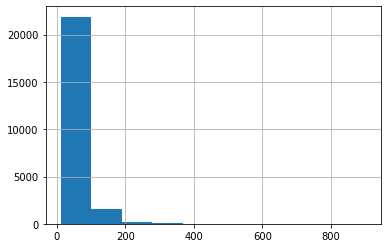

In [85]:
df['total_area'].hist()

In [86]:
df['area_cuts'] = pd.cut(df['total_area'], 10)
df.groupby('area_cuts')['last_price'].agg(['count', 'mean'])

,count,mean
area_cuts,,
"(11.112, 100.8]",21895,5.101430e+06
"(100.8, 189.6]",1539,1.845392e+07
"(189.6, 278.4]",180,4.156772e+07
"(278.4, 367.2]",51,6.158380e+07
"(367.2, 456.0]",18,1.278393e+08
"(456.0, 544.8]",11,8.570094e+07
"(544.8, 633.6]",4,1.612500e+08
"(633.6, 722.4]",0,NaN
"(722.4, 811.2]",0,NaN


In [87]:
df['area_pct'] = df['total_area'].rank(pct=True)

In [88]:
df.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year,floor_status,living_percent,kitchen_percent,area_cuts,area_pct
0,Санкт-Петербург,2019-03-07,108.0,51.0,8,False,False,3,2.70,16,False,25.0,0,18863,16028,0,20,13000000,120370,Thursday,March,2019,Другой,47.222,23.148,"(100.8, 189.6]",0.937086
1,Шушары,2018-12-04,40.4,18.6,1,False,False,1,NaN,11,False,11.0,2,12817,18603,81,7,3350000,82921,Tuesday,December,2018,Первый,46.040,27.228,"(11.112, 100.8]",0.258703
2,Санкт-Петербург,2015-08-20,56.0,34.3,4,False,False,2,NaN,5,False,8.3,0,21741,13933,558,10,5196000,92786,Thursday,August,2015,Другой,61.250,14.821,"(11.112, 100.8]",0.564665
3,Санкт-Петербург,2015-07-24,159.0,NaN,9,False,False,3,NaN,14,False,NaN,0,28098,6800,424,0,64900000,408176,Friday,July,2015,Другой,NaN,NaN,"(100.8, 189.6]",0.980020
4,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000,Tuesday,June,2018,Другой,32.000,41.000,"(11.112, 100.8]",0.921030


In [89]:
len(df[df['area_pct'] < 0.975]) / len(df)

0.9749356512933035

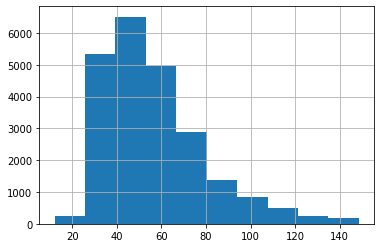

In [90]:
df[df['area_pct'] < 0.975]['total_area'].hist()

In [91]:
len(df[(df['area_pct'] < 0.975) & (df['area_pct'] > 0.05)]) / len(df)

0.9268745516688468

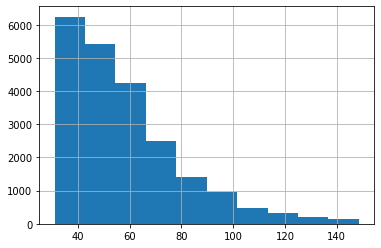

In [92]:
df[(df['area_pct'] < 0.975) & (df['area_pct'] > 0.05)]['total_area'].hist()

In [93]:
df = df[df['area_pct'] < 0.975].copy()

In [94]:
df['area_cuts'] = pd.cut(df['total_area'], 10)

In [95]:
df.groupby('area_cuts')['price_meter'].agg(['count', 'mean'])

,count,mean
area_cuts,,
"(11.863, 25.66]",258,113293.887597
"(25.66, 39.32]",5349,97192.038512
"(39.32, 52.98]",6512,91377.623157
"(52.98, 66.64]",4967,89895.786793
"(66.64, 80.3]",2890,98214.029066
"(80.3, 93.96]",1370,107984.309489
"(93.96, 107.62]",839,117406.451728
"(107.62, 121.28]",483,128971.405797
"(121.28, 134.94]",260,153595.896154


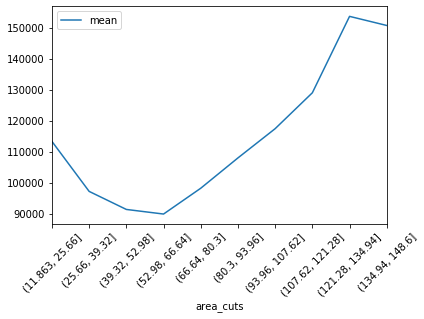

In [96]:
df.groupby('area_cuts')['price_meter'].agg(['mean']).plot(rot=45)

На этом этапе видно, что средняя цена за метр в зависимости от общего метража сначала падает, а потом уверенно растет. Скорее всего, можно говорить о том, что график состоит из двух частей. До определенного значения площади квартиры цена за метр снижается, поэтому маленькие квартиры хоть и стоят дешевле в абсолютном выражении, но в пересчете на квадратный метр, как правило, не дешевле среднестатистических. А вот когда речь идет о бОльших площадях, то зависимость уже прямая.

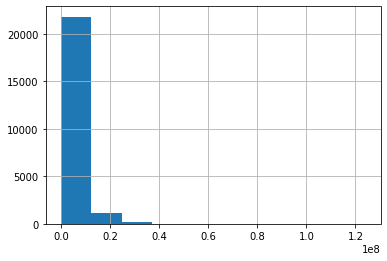

In [97]:
df['last_price'].hist()

Гистограмма для цены безотносительно к чему-либо выглядит как гистограмма с выбросами. 

In [98]:
df['price_cuts'] = pd.cut(df['last_price'], 10)
df.groupby('price_cuts')['last_price'].agg(['count', 'mean'])

,count,mean
price_cuts,,
"(-111797.81, 12410971.0]",21803,4.897145e+06
"(12410971.0, 24809752.0]",1111,1.583197e+07
"(24809752.0, 37208533.0]",137,2.911679e+07
"(37208533.0, 49607314.0]",31,4.263679e+07
"(49607314.0, 62006095.0]",13,5.320346e+07
"(62006095.0, 74404876.0]",5,6.524800e+07
"(74404876.0, 86803657.0]",3,8.144967e+07
"(86803657.0, 99202438.0]",0,NaN
"(99202438.0, 111601219.0]",0,NaN


Цену в отрыве от остальных показателей рассматривать бессмысленно, а в зависимости от них - это как раз дальнейшие задачи. Можно попробовать убрать выбросы и посмотреть гистограмму.

In [99]:
df['price_pct'] = df['last_price'].rank(pct=True)
df.head(15)

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year,floor_status,living_percent,kitchen_percent,area_cuts,area_pct,price_cuts,price_pct
0,Санкт-Петербург,2019-03-07,108.00,51.00,8,False,False,3,2.70,16,False,25.00,0,18863,16028,0,20,13000000,120370,Thursday,March,2019,Другой,47.222,23.148,"(107.62, 121.28]",0.937086,"(12410971.0, 24809752.0]",0.952478
1,Шушары,2018-12-04,40.40,18.60,1,False,False,1,NaN,11,False,11.00,2,12817,18603,81,7,3350000,82921,Tuesday,December,2018,Первый,46.040,27.228,"(39.32, 52.98]",0.258703,"(-111797.81, 12410971.0]",0.240727
2,Санкт-Петербург,2015-08-20,56.00,34.30,4,False,False,2,NaN,5,False,8.30,0,21741,13933,558,10,5196000,92786,Thursday,August,2015,Другой,61.250,14.821,"(52.98, 66.64]",0.564665,"(-111797.81, 12410971.0]",0.600303
4,Санкт-Петербург,2018-06-19,100.00,32.00,13,False,False,2,3.03,14,False,41.00,0,31856,8098,121,2,10000000,100000,Tuesday,June,2018,Другой,32.000,41.000,"(93.96, 107.62]",0.921030,"(-111797.81, 12410971.0]",0.906254
5,Янино-1,2018-09-10,30.40,14.40,5,False,False,1,NaN,12,False,9.10,0,0,0,55,10,2890000,95066,Monday,September,2018,Другой,47.368,29.934,"(25.66, 39.32]",0.041204,"(-111797.81, 12410971.0]",0.153257
6,Парголово,2017-11-02,37.30,10.60,6,False,False,1,NaN,26,False,14.40,1,52996,19143,155,6,3700000,99196,Thursday,November,2017,Другой,28.418,38.606,"(25.66, 39.32]",0.196675,"(-111797.81, 12410971.0]",0.320645
7,Санкт-Петербург,2019-04-18,71.60,NaN,22,False,False,2,NaN,24,False,18.90,2,23982,11634,0,5,7915000,110545,Thursday,April,2019,Другой,NaN,26.397,"(66.64, 80.3]",0.768049,"(-111797.81, 12410971.0]",0.836356
8,Мурино,2018-05-23,33.16,15.43,26,False,False,1,NaN,27,False,8.81,0,0,0,189,20,2900000,87455,Wednesday,May,2018,Другой,46.532,26.568,"(25.66, 39.32]",0.108908,"(-111797.81, 12410971.0]",0.157607
9,Санкт-Петербург,2017-02-26,61.00,43.60,7,False,False,3,2.50,9,False,6.50,2,50898,15008,289,18,5400000,88525,Sunday,February,2017,Другой,71.475,10.656,"(52.98, 66.64]",0.650049,"(-111797.81, 12410971.0]",0.632309
10,Санкт-Петербург,2017-11-16,39.60,20.30,3,False,False,1,2.67,12,False,8.50,0,38357,13878,137,5,5050000,127525,Thursday,November,2017,Другой,51.263,21.465,"(39.32, 52.98]",0.239504,"(-111797.81, 12410971.0]",0.582861


In [100]:
len(df[df['price_pct'] < 0.975]) / len(df)

0.974983769746808

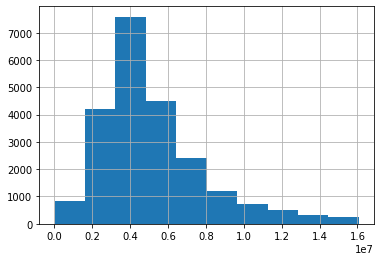

In [101]:
df[df['price_pct'] < 0.975]['last_price'].hist()

Подавляющее число представленных в выборке квартир стоят порядка 4 - 4,5 млн. рублей, следом идут чуть более дорогие предложения - около 5,2 млн. рублей, и затем чуть дешевле - порядка 3,5 млн. рублей.

Попробуем собрать однотипные действия в функцию.

In [102]:
def get_pivot_price(df, column, cuts_column, price_column):
    df[cuts_column] = pd.cut(df[column], 10)
    grouped = df.groupby(cuts_column)[price_column].agg(['count', 'mean'])
    return grouped

In [103]:
get_pivot_price(df, 'total_area', 'area_cut', 'last_price')

,count,mean
area_cut,,
"(11.863, 25.66]",258,2.589487e+06
"(25.66, 39.32]",5349,3.306129e+06
"(39.32, 52.98]",6512,4.146343e+06
"(52.98, 66.64]",4967,5.330121e+06
"(66.64, 80.3]",2890,7.182645e+06
"(80.3, 93.96]",1370,9.355491e+06
"(93.96, 107.62]",839,1.170666e+07
"(107.62, 121.28]",483,1.467570e+07
"(121.28, 134.94]",260,1.956995e+07


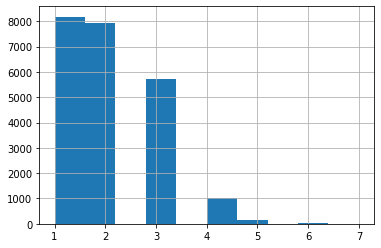

In [104]:
df[df['rooms']>0]['rooms'].hist()

Все логично, больше всего на рынке однокомнатных и двухкомнатных квартир; у трешек почетное третье место, реже встречаются 4-комнатные квартиры, а квартиры с бОльшим числом комнат ближе к эксклюзиву, чем стандартным предложениям.

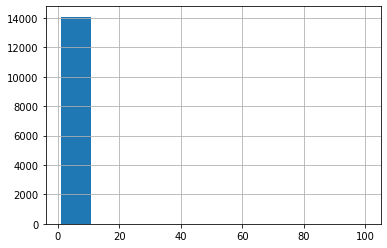

In [105]:
df['ceiling_height'].hist()

Ого, стометровые потолки. Либо мы чего-то не знаем о существовании Хагридов или йети, либо кто-то ошибся с десятичной запятой, либо это просто какой-то сбой заполнения данных. Так быть не должно. Посмотрим, выше какого значения высота потолка является неправдоподобной.

In [106]:
get_pivot_price(df, 'ceiling_height', 'ceil_cuts', 'ceiling_height')
#df['ceil_cuts'] = pd.cut(df['ceiling_height'], 10)
#df.groupby('ceil_cuts')['ceiling_height'].agg(['count', 'mean'])

,count,mean
ceil_cuts,,
"(0.901, 10.9]",14075,2.713724
"(10.9, 20.8]",2,17.000000
"(20.8, 30.7]",19,25.847368
"(30.7, 40.6]",2,32.000000
"(40.6, 50.5]",0,NaN
"(50.5, 60.4]",0,NaN
"(60.4, 70.3]",0,NaN
"(70.3, 80.2]",0,NaN
"(80.2, 90.1]",0,NaN


Без вариантов, все потолки выше 10 метров - это точно выбросы. Сравнительно большое количество объявлений с потолками от 20.8 до 30.7 метров (19 штук) наводит на мысль об ошибке заполнения - не там поставили десятичную запятую. В любом случае общее количество выбросов слишком мало, ими можно пренебречь.

In [107]:
df['ceil_pct'] = df['ceiling_height'].rank(pct=True)
df.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year,floor_status,living_percent,kitchen_percent,area_cuts,area_pct,price_cuts,price_pct,area_cut,ceil_cuts,ceil_pct
0,Санкт-Петербург,2019-03-07,108.0,51.0,8,False,False,3,2.70,16,False,25.0,0,18863,16028,0,20,13000000,120370,Thursday,March,2019,Другой,47.222,23.148,"(107.62, 121.28]",0.937086,"(12410971.0, 24809752.0]",0.952478,"(107.62, 121.28]","(0.901, 10.9]",0.597879
1,Шушары,2018-12-04,40.4,18.6,1,False,False,1,NaN,11,False,11.0,2,12817,18603,81,7,3350000,82921,Tuesday,December,2018,Первый,46.040,27.228,"(39.32, 52.98]",0.258703,"(-111797.81, 12410971.0]",0.240727,"(39.32, 52.98]",NaN,NaN
2,Санкт-Петербург,2015-08-20,56.0,34.3,4,False,False,2,NaN,5,False,8.3,0,21741,13933,558,10,5196000,92786,Thursday,August,2015,Другой,61.250,14.821,"(52.98, 66.64]",0.564665,"(-111797.81, 12410971.0]",0.600303,"(52.98, 66.64]",NaN,NaN
4,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000,Tuesday,June,2018,Другой,32.000,41.000,"(93.96, 107.62]",0.921030,"(-111797.81, 12410971.0]",0.906254,"(93.96, 107.62]","(0.901, 10.9]",0.909887
5,Янино-1,2018-09-10,30.4,14.4,5,False,False,1,NaN,12,False,9.1,0,0,0,55,10,2890000,95066,Monday,September,2018,Другой,47.368,29.934,"(25.66, 39.32]",0.041204,"(-111797.81, 12410971.0]",0.153257,"(25.66, 39.32]",NaN,NaN


In [108]:
len(df[df['ceil_pct'] < 0.975]) / len(df)

0.5951092837048257

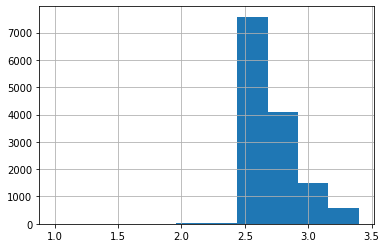

In [109]:
df[df['ceil_pct'] < 0.975]['ceiling_height'].hist()

Понятно, что потолки высотой всего два метра - это очень низкие потолки, а нули из выборки вообще нужно убрать.

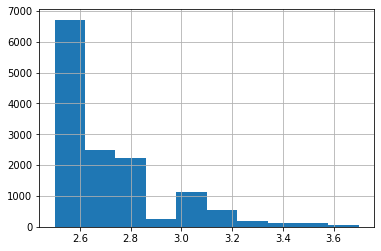

In [110]:
df[(df['ceil_pct'] < 0.99) & (df['ceil_pct'] > 0.01)]['ceiling_height'].hist()

Вот теперь картина больше похожа на правду. У большинства квартир высота потолка в пределах 2,6 м, а разумные пределы высоты укладываются в диапазоне до 3,4 - 3,6 м. 

In [111]:
boxlist1 = ['total_area', 'last_price', 'rooms', 'ceiling_height']

total_area           AxesSubplot(0.125,0.125;0.168478x0.755)
last_price        AxesSubplot(0.327174,0.125;0.168478x0.755)
rooms             AxesSubplot(0.529348,0.125;0.168478x0.755)
ceiling_height    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

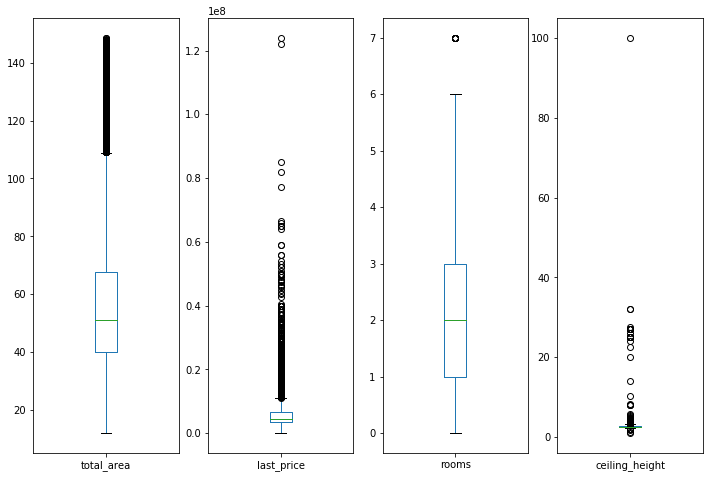

In [112]:
df[boxlist1].plot(kind='box', subplots=True, layout=(1, 4), figsize=(12,8))

Выбросы, подсчитанные с помощью boxplot: площадь квартиры больше 110 м, цена выше 10 млн, комнатность - 7. Выброс в высоте потолков, равный ста метрам, настолько искажает картину, что бокс превратился в точку.

Перейдем ко времени продажи квартиры.

In [113]:
df['days_exposition'].describe()

count    23105.000000
mean       154.733954
std        211.035378
min          0.000000
25%         23.000000
50%         73.000000
75%        196.000000
max       1580.000000
Name: days_exposition, dtype: float64

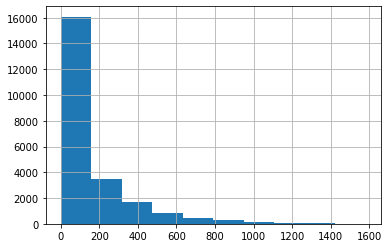

In [114]:
df['days_exposition'].hist()

1580 дней на продажу квартиры - это запредельно много. Это больше четырех лет. Вероятно, так долго может продаваться очень дорогая квартира - для интереса посмотрим, что это за предложения.

In [115]:
df[df['days_exposition'] > 1500]

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year,floor_status,living_percent,kitchen_percent,area_cuts,area_pct,price_cuts,price_pct,area_cut,ceil_cuts,ceil_pct
1109,Санкт-Петербург,2014-12-09,95.80,58.30,5,True,False,2,NaN,6,False,20.00,1,21860,318,1572,1,34878556,364077,Tuesday,December,2014,Другой,60.856,20.877,"(93.96, 107.62]",0.907443,"(24809752.0, 37208533.0]",0.996841,"(93.96, 107.62]",NaN,NaN
1885,Санкт-Петербург,2014-12-09,79.60,42.70,7,False,False,2,3.00,8,False,18.00,0,39393,11096,1513,2,13300000,167085,Tuesday,December,2014,Другой,53.643,22.613,"(66.64, 80.3]",0.833242,"(12410971.0, 24809752.0]",0.954858,"(66.64, 80.3]","(0.901, 10.9]",0.872012
6691,Пушкин,2014-12-12,42.98,18.72,1,False,False,1,NaN,5,False,11.31,0,19715,30358,1512,3,4400000,102373,Friday,December,2014,Первый,43.555,26.315,"(39.32, 52.98]",0.313347,"(-111797.81, 12410971.0]",0.466825,"(39.32, 52.98]",NaN,NaN
9553,Санкт-Петербург,2014-12-09,80.00,44.00,9,False,False,3,2.85,17,False,15.00,0,17101,17110,1553,11,10600000,132500,Tuesday,December,2014,Другой,55.000,18.750,"(66.64, 80.3]",0.838305,"(-111797.81, 12410971.0]",0.916750,"(66.64, 80.3]","(0.901, 10.9]",0.813781
18843,Новое Девяткино,2014-12-15,48.20,27.40,2,False,False,2,2.50,5,False,7.70,3,0,0,1580,11,3500000,72614,Monday,December,2014,Другой,56.846,15.975,"(39.32, 52.98]",0.444829,"(-111797.81, 12410971.0]",0.273707,"(39.32, 52.98]","(0.901, 10.9]",0.129655
20969,Санкт-Петербург,2015-02-11,133.00,58.00,2,False,False,4,3.00,5,False,45.00,0,24653,5032,1512,18,13300000,100000,Wednesday,February,2015,Другой,43.609,33.835,"(121.28, 134.94]",0.966222,"(12410971.0, 24809752.0]",0.954858,"(121.28, 134.94]","(0.901, 10.9]",0.872012


Их немного, но здесь среди квартир за десятки млн есть два предложения за вполне средние цены. Одна такая квартира находится в Новом Девяткино, вторая в Пушкине. Возможно, просто эти цены существенно выше средних в данных населенных пунктах. В любом случае это выбросы. 

In [116]:
df['exp_cuts'] = pd.cut(df['days_exposition'], 10)
df.groupby('exp_cuts')['days_exposition'].agg(['count', 'mean'])

,count,mean
exp_cuts,,
"(-1.58, 158.0]",16109,49.967906
"(158.0, 316.0]",3477,223.380213
"(316.0, 474.0]",1677,387.671437
"(474.0, 632.0]",830,544.853012
"(632.0, 790.0]",433,705.434180
"(790.0, 948.0]",261,865.636015
"(948.0, 1106.0]",172,1026.203488
"(1106.0, 1264.0]",86,1173.011628
"(1264.0, 1422.0]",45,1331.800000


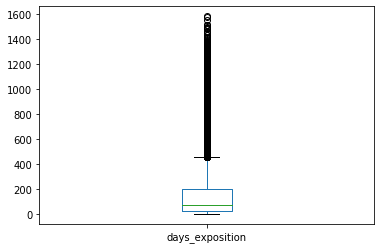

In [117]:
df.plot(y='days_exposition', kind='box')

В статус выбросов просятся категории с количеством меньше сотни (хотя если использовать boxplot, то выбросами считаются сроки продажи квартиры, превышающие 500 дней.

In [118]:
df['exp_pct'] = df['days_exposition'].rank(pct=True)
df.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year,floor_status,living_percent,kitchen_percent,area_cuts,area_pct,price_cuts,price_pct,area_cut,ceil_cuts,ceil_pct,exp_cuts,exp_pct
0,Санкт-Петербург,2019-03-07,108.0,51.0,8,False,False,3,2.70,16,False,25.0,0,18863,16028,0,20,13000000,120370,Thursday,March,2019,Другой,47.222,23.148,"(107.62, 121.28]",0.937086,"(12410971.0, 24809752.0]",0.952478,"(107.62, 121.28]","(0.901, 10.9]",0.597879,"(-1.58, 158.0]",0.065614
1,Шушары,2018-12-04,40.4,18.6,1,False,False,1,NaN,11,False,11.0,2,12817,18603,81,7,3350000,82921,Tuesday,December,2018,Первый,46.040,27.228,"(39.32, 52.98]",0.258703,"(-111797.81, 12410971.0]",0.240727,"(39.32, 52.98]",NaN,NaN,"(-1.58, 158.0]",0.523631
2,Санкт-Петербург,2015-08-20,56.0,34.3,4,False,False,2,NaN,5,False,8.3,0,21741,13933,558,10,5196000,92786,Thursday,August,2015,Другой,61.250,14.821,"(52.98, 66.64]",0.564665,"(-111797.81, 12410971.0]",0.600303,"(52.98, 66.64]",NaN,NaN,"(474.0, 632.0]",0.941896
4,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000,Tuesday,June,2018,Другой,32.000,41.000,"(93.96, 107.62]",0.921030,"(-111797.81, 12410971.0]",0.906254,"(93.96, 107.62]","(0.901, 10.9]",0.909887,"(-1.58, 158.0]",0.631552
5,Янино-1,2018-09-10,30.4,14.4,5,False,False,1,NaN,12,False,9.1,0,0,0,55,10,2890000,95066,Monday,September,2018,Другой,47.368,29.934,"(25.66, 39.32]",0.041204,"(-111797.81, 12410971.0]",0.153257,"(25.66, 39.32]",NaN,NaN,"(-1.58, 158.0]",0.418870


In [119]:
len(df[df['exp_pct'] < 0.975]) / len(df)

0.9749404890716296

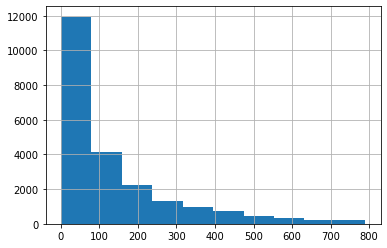

In [120]:
df[df['exp_pct'] < 0.975]['days_exposition'].hist()

Большинство квартир продается в течение квартала, это выглядит вполне логичным. Если не уложились в квартал, то в полгода тоже много предложений реализуются. Следующие градации - три квартала и год. Если квартира висит в продаже больше года, это повод серьезно пересмотреть объявление. Но интересен также вопрос, в каком случае можно считать продажу необычно быстрой. Учтем, что ранее мы заменяли нулями пропущенные значения в этом столбце, подразумевая под ними, что объявление активно на момент формирования выборки. 

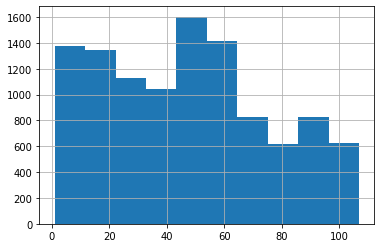

In [121]:
df[(df['exp_pct'] < 0.6) & (df['exp_pct'] > 0.1)]['days_exposition'].hist()

Итак, основная масса продаж приходится на 40-60-й день с момента публикации объявления, то есть на второй месяц. Но также довольно много продаж в первый месяц и даже в первую неделю. Вот этот период и можно считать периодом быстрых продаж недвижимости.

Окончательно избавимся от выбросов.

In [122]:
df.describe()

,total_area,living_area,floor,rooms,ceiling_height,floors_total,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,year,living_percent,kitchen_percent,area_pct,price_pct,ceil_pct,exp_pct
count,23105.000000,21273.000000,23105.000000,23105.000000,14099.000000,23105.000000,20897.000000,23105.000000,23105.000000,23105.000000,23105.000000,23105.000000,2.310500e+04,23105.000000,23105.000000,21273.000000,20897.000000,23105.000000,23105.000000,14099.000000,23105.000000
mean,56.431746,32.267652,5.902186,2.003592,2.757980,10.705735,10.191096,0.594503,21953.630989,10981.676390,154.733954,9.816879,5.677591e+06,97375.022549,2017.375893,56.415466,18.886687,0.487489,0.500022,0.500035,0.500022
std,22.725399,15.299156,4.901360,0.936587,1.274147,6.640346,4.927404,0.957817,16576.659918,9670.849821,211.035378,5.641723,4.489795e+06,41210.448282,1.033929,10.477912,7.235237,0.281439,0.288676,0.285813,0.288344
min,12.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,1.219000e+04,112.000000,2014.000000,2.158000,4.352000,0.000042,0.000043,0.000071,0.065614
25%,40.000000,18.500000,2.000000,1.000000,2.500000,5.000000,7.000000,0.000000,9822.000000,2004.000000,23.000000,6.000000,3.400000e+06,76167.000000,2017.000000,49.488000,13.490000,0.248323,0.251591,0.129655,0.251699
50%,51.000000,30.000000,4.000000,2.000000,2.650000,9.000000,9.000000,0.000000,21604.000000,11409.000000,73.000000,9.000000,4.580000e+06,94595.000000,2017.000000,56.716000,17.385000,0.485442,0.500065,0.512980,0.500844
75%,67.600000,41.500000,8.000000,3.000000,2.800000,16.000000,11.600000,1.000000,34496.000000,15362.000000,196.000000,14.000000,6.500000e+06,113314.000000,2018.000000,63.636000,23.333000,0.731170,0.747868,0.771615,0.750422
max,148.600000,128.000000,33.000000,7.000000,100.000000,60.000000,93.000000,5.000000,84869.000000,65968.000000,1580.000000,50.000000,1.240000e+08,995984.000000,2019.000000,100.000000,78.788000,0.974936,1.000000,1.000000,1.000000


In [123]:
df = df[(df['ceil_pct'] < 0.99) & (df['ceil_pct'] > 0.01)].copy()

In [124]:
df = df[(df['exp_pct'] < 0.975) & (df['exp_pct'] > 0.1)].copy()

In [125]:
df.describe()

,total_area,living_area,floor,rooms,ceiling_height,floors_total,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,year,living_percent,kitchen_percent,area_pct,price_pct,ceil_pct,exp_pct
count,11213.000000,10577.000000,11213.000000,11213.000000,11213.000000,11213.000000,10462.000000,11213.000000,11213.000000,11213.000000,11213.000000,11213.000000,1.121300e+04,11213.000000,11213.000000,10577.000000,10462.000000,11213.000000,11213.000000,11213.000000,11213.000000
mean,55.892449,32.133878,5.738607,2.000624,2.695899,10.450638,10.002895,0.693659,23109.732543,11578.080264,159.128601,10.062695,5.607254e+06,97662.100687,2017.418443,56.666216,18.736564,0.483029,0.504273,0.491771,0.560958
std,22.061898,15.007255,4.682773,0.922090,0.218161,6.275245,4.793010,1.001369,16368.250676,9625.694984,166.464226,5.538766,4.289759e+06,37862.562327,0.882737,10.188287,7.084232,0.278627,0.278887,0.277052,0.246051
min,12.000000,2.000000,1.000000,0.000000,2.500000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.219000e+04,112.000000,2014.000000,2.158000,5.517000,0.000042,0.000043,0.129655,0.131227
25%,40.000000,18.600000,2.000000,1.000000,2.500000,5.000000,7.000000,0.000000,11964.000000,4229.000000,43.000000,6.000000,3.500000e+06,77832.000000,2017.000000,50.000000,13.510250,0.248323,0.273707,0.129655,0.340987
50%,50.700000,30.000000,4.000000,2.000000,2.650000,9.000000,9.000000,0.000000,22531.000000,11876.000000,95.000000,10.000000,4.600000e+06,95233.000000,2018.000000,57.029000,17.319000,0.479936,0.506579,0.512980,0.568665
75%,67.000000,41.100000,8.000000,3.000000,2.770000,15.000000,11.340000,1.000000,35430.000000,15384.000000,218.000000,14.000000,6.417500e+06,113095.000000,2018.000000,63.677000,22.929250,0.724967,0.740143,0.730655,0.775092
max,148.600000,128.000000,27.000000,7.000000,3.700000,60.000000,72.000000,5.000000,83758.000000,64857.000000,790.000000,35.000000,1.240000e+08,995984.000000,2019.000000,98.345000,72.327000,0.974936,1.000000,0.989290,0.974940


Из выбивающихся значений бросается в глаза нулевая общая этажность. Этаж может быть как минимум один.

In [126]:
df[df['floors_total'] == 0]

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year,floor_status,living_percent,kitchen_percent,area_cuts,area_pct,price_cuts,price_pct,area_cut,ceil_cuts,ceil_pct,exp_cuts,exp_pct
10058,Шушары,2018-09-10,25.0,17.0,21,False,False,1,2.65,0,False,3.5,0,0,0,23,9,3350000,134000,Monday,September,2018,Другой,68.000,14.000,"(11.863, 25.66]",0.008988,"(-111797.81, 12410971.0]",0.240727,"(11.863, 25.66]","(0.901, 10.9]",0.512980,"(-1.58, 158.0]",0.251699
10568,Санкт-Петербург,2018-10-02,100.0,51.0,4,False,False,3,2.80,0,False,40.0,0,30766,8059,140,12,14900000,149000,Tuesday,October,2018,Другой,51.000,40.000,"(93.96, 107.62]",0.921030,"(12410971.0, 24809752.0]",0.967345,"(93.96, 107.62]","(0.901, 10.9]",0.771615,"(-1.58, 158.0]",0.666544
16668,Санкт-Петербург,2017-10-24,108.0,NaN,3,False,False,3,2.80,0,False,NaN,0,26402,5249,91,0,15950000,147685,Tuesday,October,2017,Другой,NaN,NaN,"(107.62, 121.28]",0.937086,"(12410971.0, 24809752.0]",0.973707,"(107.62, 121.28]","(0.901, 10.9]",0.771615,"(-1.58, 158.0]",0.557217
22542,Санкт-Петербург,2017-05-24,63.5,NaN,3,False,False,2,2.80,0,False,NaN,0,51340,15363,512,5,8500000,133858,Wednesday,May,2017,Другой,NaN,NaN,"(52.98, 66.64]",0.686675,"(-111797.81, 12410971.0]",0.861459,"(52.98, 66.64]","(0.901, 10.9]",0.771615,"(474.0, 632.0]",0.931487
23658,Санкт-Петербург,2016-11-28,43.8,14.0,8,False,False,1,2.70,0,False,15.5,2,8426,12082,246,6,3063600,69945,Monday,November,2016,Другой,31.963,35.388,"(39.32, 52.98]",0.335499,"(-111797.81, 12410971.0]",0.184376,"(39.32, 52.98]","(0.901, 10.9]",0.597879,"(158.0, 316.0]",0.799437


В наши дни возможно все, но тем не менее для случаев, когда указана нулевая этажность дома, этаж квартиры все же указан, и непохоже, чтобы это был последний этаж. Так что категория этажа, будем считать, определена верно. Тем не менее выбивающиеся значения нужно убрать.

In [127]:
df = df[(df['floors_total'] > 0)].copy()

In [128]:
df.describe()

,total_area,living_area,floor,rooms,ceiling_height,floors_total,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,year,living_percent,kitchen_percent,area_pct,price_pct,ceil_pct,exp_pct
count,11208.000000,10574.000000,11208.000000,11208.000000,11208.000000,11208.00000,10459.000000,11208.000000,11208.000000,11208.000000,11208.000000,11208.000000,1.120800e+04,11208.000000,11208.00000,10574.000000,10459.000000,11208.000000,11208.000000,11208.000000,11208.000000
mean,55.887021,32.135240,5.737687,2.000625,2.695874,10.45530,10.000123,0.693790,23109.608940,11579.609297,159.109297,10.064329,5.605673e+06,97649.058440,2017.41854,56.668016,18.733392,0.482987,0.504210,0.491684,0.560922
std,22.055050,15.006504,4.681378,0.922102,0.218203,6.27276,4.783989,1.001431,16367.497058,9626.910067,166.459654,5.538807,4.288498e+06,37860.947104,0.88278,10.186154,7.080173,0.278579,0.278832,0.277074,0.246052
min,12.000000,2.000000,1.000000,0.000000,2.500000,1.00000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.219000e+04,112.000000,2014.00000,2.158000,5.517000,0.000042,0.000043,0.129655,0.131227
25%,40.000000,18.600000,2.000000,1.000000,2.500000,5.00000,7.000000,0.000000,11964.000000,4228.000000,43.000000,6.000000,3.500000e+06,77830.500000,2017.00000,50.000000,13.509500,0.248323,0.273707,0.129655,0.340987
50%,50.700000,30.000000,4.000000,2.000000,2.650000,9.00000,9.000000,0.000000,22530.500000,11876.000000,95.000000,10.000000,4.600000e+06,95223.500000,2018.00000,57.033000,17.318000,0.479936,0.506579,0.512980,0.568665
75%,67.000000,41.100000,8.000000,3.000000,2.770000,15.00000,11.305000,1.000000,35432.750000,15387.000000,217.250000,14.000000,6.404250e+06,113073.000000,2018.00000,63.676750,22.927000,0.724967,0.740002,0.730655,0.774216
max,148.600000,128.000000,27.000000,7.000000,3.700000,60.00000,72.000000,5.000000,83758.000000,64857.000000,790.000000,35.000000,1.240000e+08,995984.000000,2019.00000,98.345000,72.327000,0.974936,1.000000,0.989290,0.974940


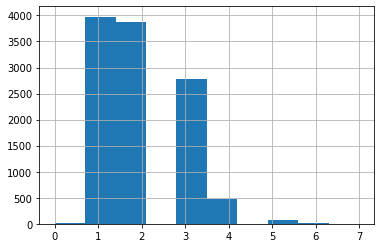

In [129]:
df['rooms'].hist()

Выше в гистограмме были убраны студии. Видим, что студий настолько мало, что их можно счесть за выбросы. Тем не менее, вероятно, они заслуживают отдельного исследования.

In [130]:
df['room_cuts'] = pd.cut(df['rooms'], 7)
df.groupby('room_cuts')['last_price'].agg(['count', 'mean'])

,count,mean
room_cuts,,
"(-0.007, 1.0]",3983,3.812130e+06
"(1.0, 2.0]",3882,5.459702e+06
"(2.0, 3.0]",2782,7.554935e+06
"(3.0, 4.0]",478,9.461832e+06
"(4.0, 5.0]",74,1.074254e+07
"(5.0, 6.0]",7,1.108071e+07
"(6.0, 7.0]",2,1.850000e+07


Очевидно линейная зависимость. Проиллюстрируем ее.

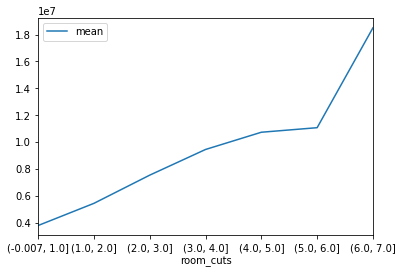

In [131]:
df.groupby('room_cuts')['last_price'].agg(['mean']).plot()

Можно даже так:

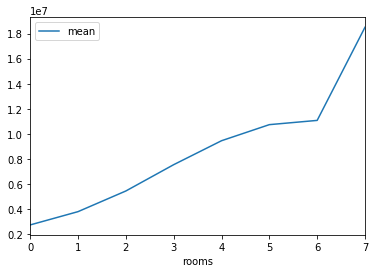

In [132]:
df.groupby('rooms')['last_price'].agg(['mean']).plot()

Итак, чем выше число комнат, тем выше цена. Между пяти- и шестикомнатными квартирами почти равенство, а дальше скачок, который можно интерпретировать по-разному. Если считать семикомнатные и дальше квартиры выбросом, то рост цены квартиры замедляется с ростом комнатности. Если нет, то можно сделать предположение о скачкообразности дальнейшего роста, но для подкрепления этого вывода не хватает выборки: в нашей есть максимум семикомнатные квартиры. Интересно также, как растет цена квадратного метра в зависимости от количества комнат.

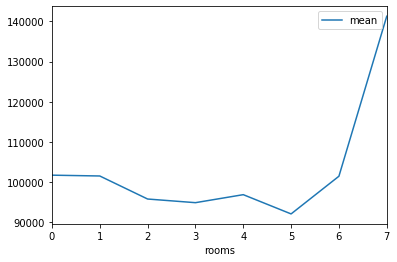

In [133]:
df.groupby('rooms')['price_meter'].agg(['mean']).plot()

У пятикомнатных квартир самая низкая цена квадратного метра! У семикомнатных она настолько велика, что и правда похоже на выброс. Интересно было бы посмотреть на эти же зависимости без семикомнатных квартир.

In [134]:
rooms6 = df[df['rooms'] < 7]

In [135]:
rooms6.describe()

,total_area,living_area,floor,rooms,ceiling_height,floors_total,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,year,living_percent,kitchen_percent,area_pct,price_pct,ceil_pct,exp_pct
count,11206.000000,10572.000000,11206.000000,11206.000000,11206.000000,11206.000000,10457.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,1.120600e+04,11206.000000,11206.000000,10572.00000,10457.000000,11206.000000,11206.000000,11206.000000,11206.000000
mean,55.873883,32.123726,5.738087,1.999732,2.695767,10.456095,9.998670,0.693914,23109.275656,11580.665358,159.100571,10.062823,5.603371e+06,97641.270748,2017.418704,56.66519,18.734339,0.482901,0.504127,0.491601,0.560890
std,22.034996,14.983787,4.681658,0.919762,0.218075,6.273037,4.782473,1.001477,16368.938282,9627.443113,166.470601,5.538150,4.284539e+06,37855.003076,0.882749,10.18471,7.080121,0.278530,0.278788,0.277028,0.246059
min,12.000000,2.000000,1.000000,0.000000,2.500000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.219000e+04,112.000000,2014.000000,2.15800,5.517000,0.000042,0.000043,0.129655,0.131227
25%,40.000000,18.600000,2.000000,1.000000,2.500000,5.000000,7.000000,0.000000,11964.000000,4226.000000,43.000000,6.000000,3.500000e+06,77827.500000,2017.000000,50.00000,13.510000,0.248323,0.273707,0.129655,0.340987
50%,50.700000,30.000000,4.000000,2.000000,2.650000,9.000000,9.000000,0.000000,22528.000000,11877.000000,95.000000,10.000000,4.600000e+06,95222.500000,2018.000000,57.02400,17.318000,0.479936,0.506579,0.512980,0.568665
75%,67.000000,41.062500,8.000000,3.000000,2.760000,15.000000,11.300000,1.000000,35438.250000,15387.000000,217.000000,14.000000,6.400000e+06,113068.250000,2018.000000,63.67525,22.927000,0.724967,0.738347,0.726399,0.773923
max,148.600000,128.000000,27.000000,6.000000,3.700000,60.000000,72.000000,5.000000,83758.000000,64857.000000,790.000000,35.000000,1.240000e+08,995984.000000,2019.000000,98.34500,72.327000,0.974936,1.000000,0.989290,0.974940


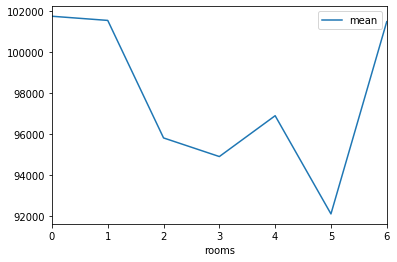

In [136]:
rooms6.groupby('rooms')['price_meter'].agg(['mean']).plot()

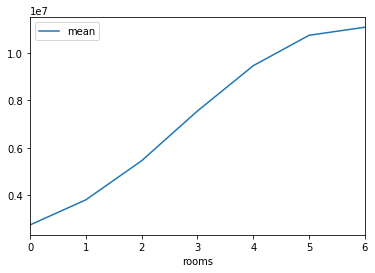

In [137]:
rooms6.groupby('rooms')['last_price'].agg(['mean']).plot()

Итак, любопытная закономерность. Общая цена квартиры неуклонно растет в зависимости от числа комнат, а вот цена метра достигает наивысших значений в случае студий и шестикомнатных квартир, а в целом неуклонно снижается в пределах от одной до пяти комнат, за исключением четырехкомнатных.

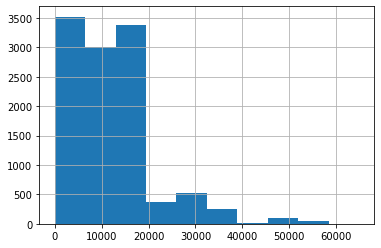

In [138]:
df['cityCenters_nearest'].hist()

Много квартир в пределах 20 км от центра, еще чуть-чуть в радиусе 40 км, затем малое количество между 50 и 60 км. Приблизимся.

In [139]:
df['dist_cuts'] = pd.cut(df['cityCenters_nearest'], 10)
df.groupby('dist_cuts')['last_price'].agg(['count', 'mean'])

,count,mean
dist_cuts,,
"(-64.857, 6485.7]",3522,5.588977e+06
"(6485.7, 12971.4]",3000,6.402561e+06
"(12971.4, 19457.1]",3373,5.340676e+06
"(19457.1, 25942.8]",364,4.661258e+06
"(25942.8, 32428.5]",523,4.362750e+06
"(32428.5, 38914.2]",260,4.910199e+06
"(38914.2, 45399.9]",20,3.773950e+06
"(45399.9, 51885.6]",101,3.979366e+06
"(51885.6, 58371.3]",41,4.295244e+06


В принципе, уже видна линейная зависимость: чем дальше от центра, тем дешевле. 

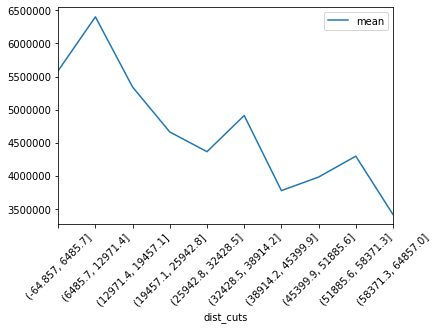

In [140]:
df.groupby('dist_cuts')['last_price'].agg(['mean']).plot(rot=45)

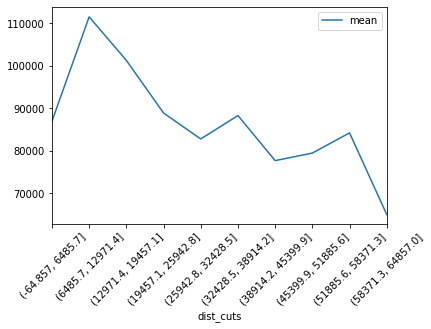

In [141]:
df.groupby('dist_cuts')['price_meter'].agg(['mean']).plot(rot=45)

В зависимости от удаленности от центра цена за метр снижается даже более ровно, чем общая цена квартиры, но общая тенденция там и там налицо.

In [142]:
df.groupby('floor_status')['last_price'].agg(['count', 'mean'])

,count,mean
floor_status,,
Другой,8286,5.861669e+06
Первый,1389,4.374172e+06
Последний,1533,5.337810e+06


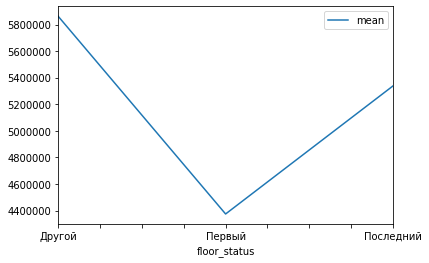

In [143]:
df.groupby('floor_status')['last_price'].agg(['mean']).plot()

Здесь тоже все понятно. Самые дешевые квартиры на первых этажах, чуть дороже - на последних.

In [144]:
df.groupby('weekday')['last_price'].agg(['count', 'mean'])

,count,mean
weekday,,
Friday,1823,5.551735e+06
Monday,1770,5.456352e+06
Saturday,910,5.383881e+06
Sunday,761,5.447294e+06
Thursday,2072,5.774726e+06
Tuesday,2028,5.775598e+06
Wednesday,1844,5.600301e+06


Больше всего объявлений публикуется по вторникам и четвергам, меньше всего - по выходным. Вероятно, это связано с тем, что по выходным большинство агентств недвижимости не работает.

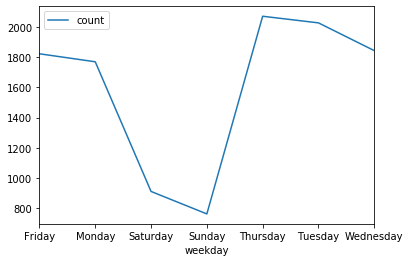

In [145]:
df.groupby('weekday')['last_price'].agg(['count']).plot()

Неинформативно, надо упорядочить по дням недели

In [146]:
df['day'] = df['date_post'].dt.dayofweek

In [147]:
df.groupby('day')['last_price'].agg(['count', 'mean'])

,count,mean
day,,
0,1770,5.456352e+06
1,2028,5.775598e+06
2,1844,5.600301e+06
3,2072,5.774726e+06
4,1823,5.551735e+06
5,910,5.383881e+06
6,761,5.447294e+06


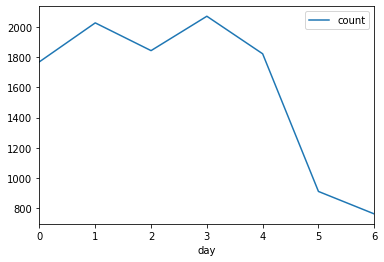

In [148]:
df.groupby('day')['last_price'].agg(['count']).plot()

Другое дело. Действительно, в выходные люди предпочитают отдыхать, а не публиковать объявления.

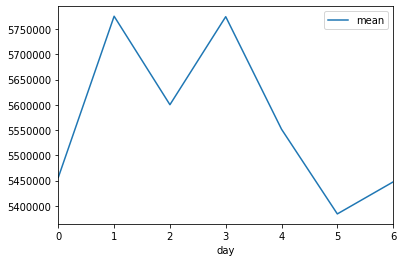

In [149]:
df.groupby('day')['last_price'].agg(['mean']).plot()

Забавно, но в объявлениях, опубликованных в выходные, еще и средняя цена ниже - в среднем на 350 000 рублей. Если верно предположение о том, что в выходные объявления публикуют в основном частные лица, то в таких объявлениях цена ближе к реальной, поскольку агентства и риелторы включают в цену агентскую комиссию - она примерно 300-400 тыс. и составляет.

In [150]:
df['month_number'] = df['date_post'].dt.month

In [151]:
df.groupby('month_number')['last_price'].agg(['count', 'mean'])

,count,mean
month_number,,
1,720,5.860163e+06
2,1314,5.623657e+06
3,1143,5.248927e+06
4,779,5.767441e+06
5,545,5.730293e+06
6,791,5.307530e+06
7,905,5.714689e+06
8,945,5.646648e+06
9,1037,5.839179e+06


Чаще всего объявления о продаже квартиры публикуются в самом коротком месяце года - феврале. Перезимовали, можно строить планы на весну и лето на новом месте. Меньше всего объявлений в декабре (что логично - кому нужны лишние хлопоты перед Новым годом, никто не хочет повторить судьбу Лукашина) и самых праздничных месяцах - январе и мае. 

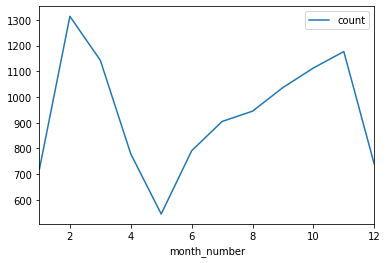

In [152]:
df.groupby('month_number')['last_price'].agg(['count']).plot()

В мае внушительный провал. Все на картошке?

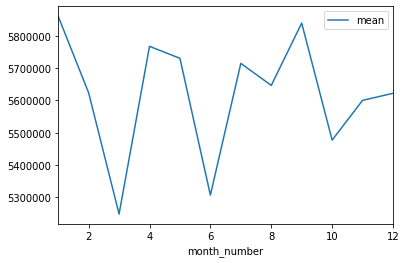

In [153]:
df.groupby('month_number')['last_price'].agg(['mean']).plot()

Самая высокая цена на квартиры - в январе, самая низкая в марте. При этом явной зависимости цены от месяца публикации объявления, скорее всего, нет.

In [154]:
df.groupby('year')['last_price'].agg(['count', 'mean'])

,count,mean
year,,
2014,27,7.285782e+06
2015,308,6.313781e+06
2016,1121,5.962779e+06
2017,4039,5.757928e+06
2018,4917,5.360478e+06
2019,796,5.513820e+06


Из 2014 года в подборку попало два месяца, поэтому и объявлений мало. За 2019 год в подборке уже пять месяцев, поэтому объявлений тоже меньше тысячи. А вот провал в 2015 году удивителен. 

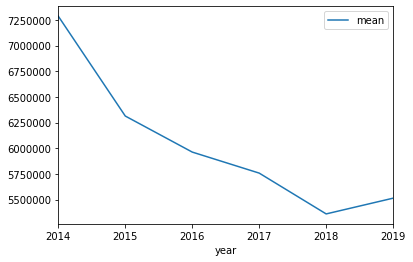

In [155]:
df.groupby('year')['last_price'].agg(['mean']).plot()

Цена на недвижимость уверенно снижается год от года и только в 2019 году вернулась в рост.

In [156]:
top_cities = (df
              .groupby('clean_name')['price_meter'].agg(['count', 'mean'])
              .sort_values(by='count', ascending = False)
             )

In [157]:
top_cities.head(10)

,count,mean
clean_name,,
Санкт-Петербург,7751,110189.451426
Всеволожск,214,66422.009346
Мурино,204,87234.348039
Шушары,186,78216.161290
Колпино,175,75043.211429
Пушкин,171,100725.327485
Кудрово,171,94894.923977
Петергоф,119,83033.260504
Гатчина,119,69696.344538


По количеству объявлений Санкт-Петербург лидирует с большим отрывом, в 36 раз больше объявлений, чем у следующего в списке Всеволожска. По средней стоимости метра лидирует также Северная столица, а вот на втором месте не Всеволожск, а Пушкин. У Всеволожска самый дешевый метр из всей топ-десятки населенных пунктов по числу объявлений.

In [158]:
(df
              .groupby('clean_name')['price_meter'].agg(['count', 'mean'])
              .sort_values(by='mean', ascending = False)
             )

,count,mean
clean_name,,
Зеленогорск,16,118401.875000
Санкт-Петербург,7751,110189.451426
Сестрорецк,106,102294.235849
Пушкин,171,100725.327485
Неизвестно,12,97053.250000
...,...,...
Житково,1,15648.000000
Фалилеево,1,13304.000000
Ефимовский,1,12687.000000


Внезапно самый дорогой метр оказался в Зеленогорске. Также в топ-5 проникла категория "Неизвестно". Самый дешевый метр в населенных пунктах Житково, Фалилеево, Ефимовском, Совхозном и Вахновой Каре - цена не превышает 16 000 рублей. Эти населенные пункты представлены в почти пятилетней выборке всего одним объявлением каждое. Для справки, в 2014 году население Вахновой Кары составляло 330 человек, это вполне объясняет и стоимость метра, и количество объявлений.

In [159]:
piter = df[df['clean_name'] == 'Санкт-Петербург'].reset_index()

In [160]:
piter = piter[['clean_name', 'date_post', 'total_area', 'living_area', 'floor', 'is_apartment', 'studio', 'rooms', 'ceiling_height', 'floors_total', 'open_plan', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'days_exposition', 'total_images', 'last_price', 'price_meter', 'weekday', 'month', 'year', 'floor_status', 'living_percent', 'kitchen_percent']]
piter.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year,floor_status,living_percent,kitchen_percent
0,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000,Tuesday,June,2018,Другой,32.000,41.000
1,Санкт-Петербург,2017-02-26,61.0,43.6,7,False,False,3,2.50,9,False,6.5,2,50898,15008,289,18,5400000,88525,Sunday,February,2017,Другой,71.475,10.656
2,Санкт-Петербург,2017-11-16,39.6,20.3,3,False,False,1,2.67,12,False,8.5,0,38357,13878,137,5,5050000,127525,Thursday,November,2017,Другой,51.263,21.465
3,Санкт-Петербург,2017-11-23,82.0,55.6,1,False,False,3,3.05,5,False,9.0,0,22108,10698,397,11,6700000,81707,Thursday,November,2017,Первый,67.805,10.976
4,Санкт-Петербург,2017-01-27,31.0,19.4,2,False,False,1,2.50,5,False,5.6,1,44060,10842,168,8,3250000,104839,Friday,January,2017,Другой,62.581,18.065


In [161]:
piter['distance'] = piter['cityCenters_nearest'] / 1000

In [162]:
piter['distance'] = piter['distance'].round()

In [163]:
piter['distance'] = piter['distance'].astype('int')

In [164]:
piter.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year,floor_status,living_percent,kitchen_percent,distance
0,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000,Tuesday,June,2018,Другой,32.000,41.000,8
1,Санкт-Петербург,2017-02-26,61.0,43.6,7,False,False,3,2.50,9,False,6.5,2,50898,15008,289,18,5400000,88525,Sunday,February,2017,Другой,71.475,10.656,15
2,Санкт-Петербург,2017-11-16,39.6,20.3,3,False,False,1,2.67,12,False,8.5,0,38357,13878,137,5,5050000,127525,Thursday,November,2017,Другой,51.263,21.465,14
3,Санкт-Петербург,2017-11-23,82.0,55.6,1,False,False,3,3.05,5,False,9.0,0,22108,10698,397,11,6700000,81707,Thursday,November,2017,Первый,67.805,10.976,11
4,Санкт-Петербург,2017-01-27,31.0,19.4,2,False,False,1,2.50,5,False,5.6,1,44060,10842,168,8,3250000,104839,Friday,January,2017,Другой,62.581,18.065,11


In [165]:
piter.groupby('distance')['price_meter'].agg(['count', 'mean'])

,count,mean
distance,,
0,18,144699.722222
1,81,136469.851852
2,128,143304.046875
3,147,112233.530612
4,280,127370.967857
5,365,135338.183562
6,250,136545.432000
7,184,140169.494565
8,294,122009.901361


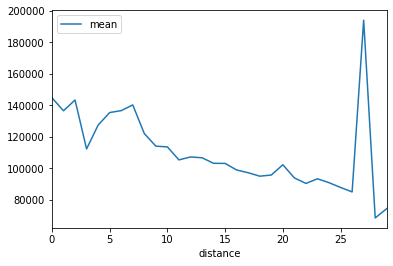

In [166]:
piter.groupby('distance')['price_meter'].agg(['mean']).plot()

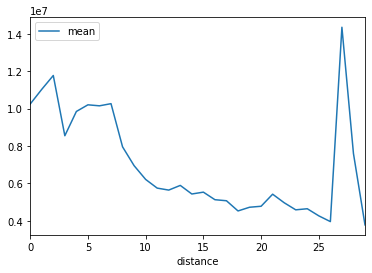

In [167]:
piter.groupby('distance')['last_price'].agg(['mean']).plot()

Первое падение цены как общей, так и за квадрат происходит на отметке 3 км от центра, но графики быстро выравниваются. А вот от 7 до 10 км от центра цена стремительно падает вниз, особенно явно это видно на графике полной цены. Резкий скачок на 27-м километре - это выброс, там ровно одно предложение. Можно убрать его из графика. 

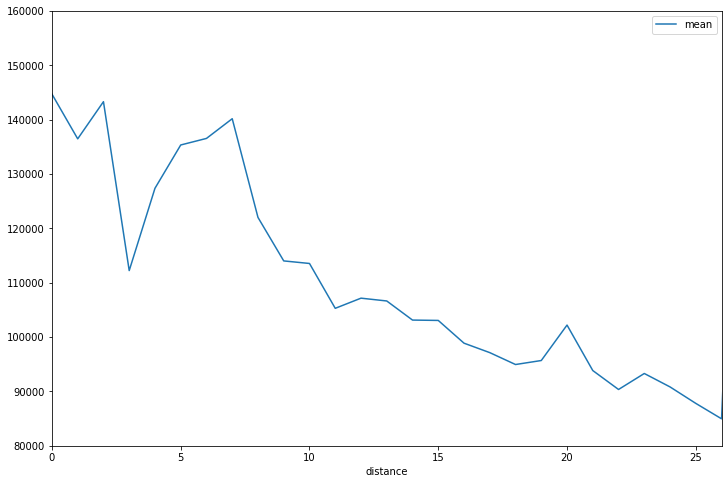

In [168]:
piter.groupby('distance')['price_meter'].agg(['mean']).plot(xlim = (0, 26), ylim = (80000, 160000), figsize = (12,8))

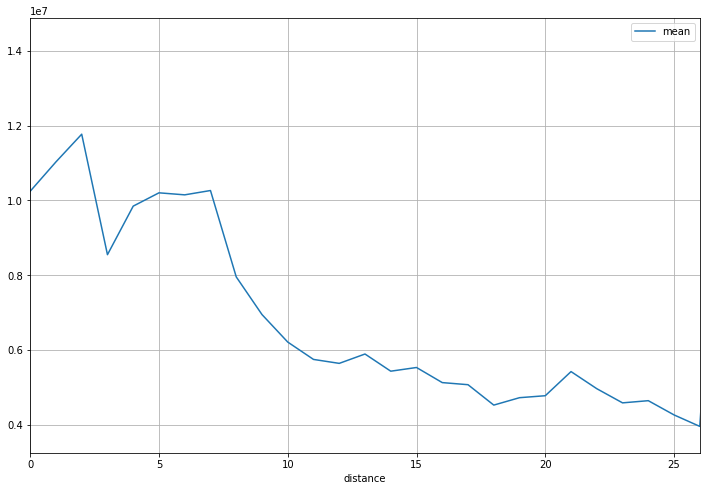

In [169]:
piter.groupby('distance')['last_price'].agg(['mean']).plot(xlim = (0, 26), figsize = (12,8), grid=True)

За пределами 10-км радиуса цена квадрата не превышает 110 тыс.руб. Принимаем 10-км радиус за центральную зону.

In [170]:
piter_center = piter[piter['distance'] < 11].copy()
piter_center.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year,floor_status,living_percent,kitchen_percent,distance
0,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000,Tuesday,June,2018,Другой,32.000,41.000,8
14,Санкт-Петербург,2016-03-28,41.0,18.1,4,False,False,1,2.80,7,False,11.1,2,13772,9626,152,14,4350000,106098,Monday,March,2016,Другой,44.146,27.073,10
16,Санкт-Петербург,2018-09-11,118.0,68.0,7,False,False,3,3.00,9,False,16.0,0,26055,4800,37,2,20000000,169492,Tuesday,September,2018,Другой,57.627,13.559,5
17,Санкт-Петербург,2018-03-03,57.0,39.0,2,False,False,3,2.50,5,False,7.0,0,35361,10484,216,7,4400000,77193,Saturday,March,2018,Другой,68.421,12.281,10
20,Санкт-Петербург,2018-11-26,46.3,27.8,5,False,False,2,3.00,5,False,8.0,0,13334,9319,65,13,5200000,112311,Monday,November,2018,Последний,60.043,17.279,9


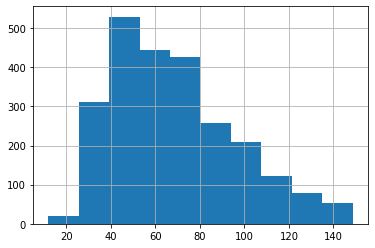

In [171]:
piter_center['total_area'].hist()

In [172]:
piter_center['area_cuts'] = pd.cut(piter_center['total_area'], 10)
piter_center.groupby('area_cuts')['last_price'].agg(['count', 'mean'])

,count,mean
area_cuts,,
"(11.863, 25.66]",21,3.393191e+06
"(25.66, 39.32]",312,4.093477e+06
"(39.32, 52.98]",529,5.511471e+06
"(52.98, 66.64]",444,7.068432e+06
"(66.64, 80.3]",428,9.215969e+06
"(80.3, 93.96]",254,1.074333e+07
"(93.96, 107.62]",208,1.266127e+07
"(107.62, 121.28]",121,1.563553e+07
"(121.28, 134.94]",79,2.213943e+07


In [173]:
piter_center['area_pct'] = piter_center['total_area'].rank(pct=True)

In [174]:
piter_center.head()

,clean_name,date_post,total_area,living_area,floor,is_apartment,studio,rooms,ceiling_height,floors_total,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,total_images,last_price,price_meter,weekday,month,year,floor_status,living_percent,kitchen_percent,distance,area_cuts,area_pct
0,Санкт-Петербург,2018-06-19,100.0,32.0,13,False,False,2,3.03,14,False,41.0,0,31856,8098,121,2,10000000,100000,Tuesday,June,2018,Другой,32.000,41.000,8,"(93.96, 107.62]",0.860964
14,Санкт-Петербург,2016-03-28,41.0,18.1,4,False,False,1,2.80,7,False,11.1,2,13772,9626,152,14,4350000,106098,Monday,March,2016,Другой,44.146,27.073,10,"(39.32, 52.98]",0.151490
16,Санкт-Петербург,2018-09-11,118.0,68.0,7,False,False,3,3.00,9,False,16.0,0,26055,4800,37,2,20000000,169492,Tuesday,September,2018,Другой,57.627,13.559,5,"(107.62, 121.28]",0.935484
17,Санкт-Петербург,2018-03-03,57.0,39.0,2,False,False,3,2.50,5,False,7.0,0,35361,10484,216,7,4400000,77193,Saturday,March,2018,Другой,68.421,12.281,10,"(52.98, 66.64]",0.413638
20,Санкт-Петербург,2018-11-26,46.3,27.8,5,False,False,2,3.00,5,False,8.0,0,13334,9319,65,13,5200000,112311,Monday,November,2018,Последний,60.043,17.279,9,"(39.32, 52.98]",0.263169


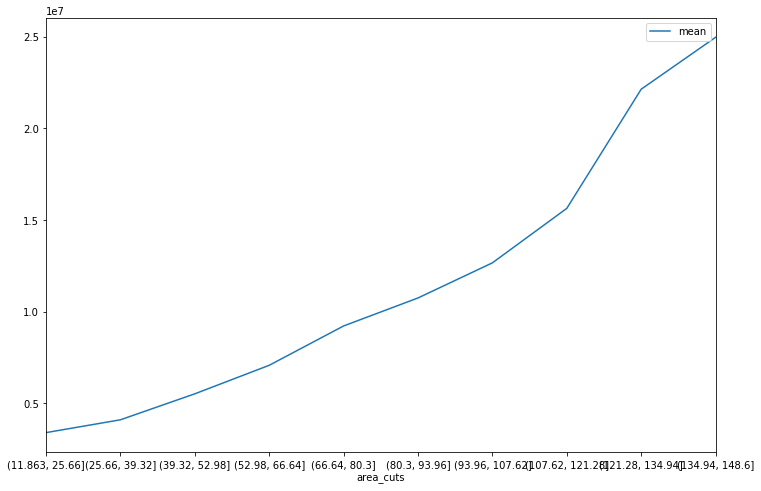

In [175]:
piter_center.groupby('area_cuts')['last_price'].agg(['mean']).plot(figsize=(12, 8))

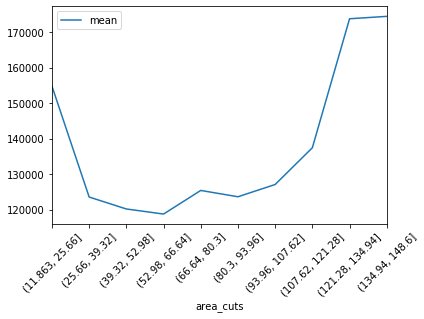

In [176]:
piter_center.groupby('area_cuts')['price_meter'].agg(['mean']).plot(rot=45)

Та же картина, что и в целом по исходной выборке. Если в целом стоимость квартиры неуклонно растет с ростом площади, то цена метра для маленьких квартир существенно выше среднестатистической, затем резко падает к среднестатистическим значениям и медленно растет вместе с ростом площади до 121 метра, после чего рост резко ускоряется. 

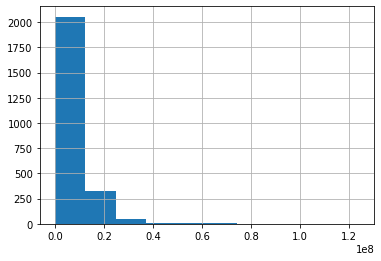

In [177]:
piter_center['last_price'].hist()

In [178]:
piter_center['price_cuts'] = pd.cut(piter_center['last_price'], 10)
piter_center.groupby('price_cuts')['last_price'].agg(['count', 'mean'])

,count,mean
price_cuts,,
"(-111797.81, 12410971.0]",2055,6.761437e+06
"(12410971.0, 24809752.0]",325,1.603395e+07
"(24809752.0, 37208533.0]",50,2.881620e+07
"(37208533.0, 49607314.0]",7,4.326343e+07
"(49607314.0, 62006095.0]",7,5.468571e+07
"(62006095.0, 74404876.0]",3,6.513000e+07
"(74404876.0, 86803657.0]",0,NaN
"(86803657.0, 99202438.0]",0,NaN
"(99202438.0, 111601219.0]",0,NaN


Видим два выброса. Их точно нужно убрать из выборки, они искажают картину.

In [179]:
piter_center['price_pct'] = piter_center['last_price'].rank(pct=True)

In [180]:
len(piter_center[piter_center['price_pct'] < 0.975]) / len(piter_center)

0.976725193956717

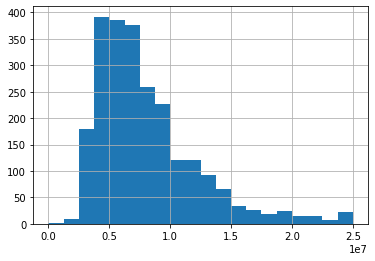

In [181]:
piter_center[piter_center['price_pct'] < 0.975]['last_price'].hist(bins=20)

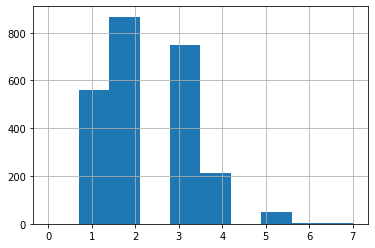

In [182]:
piter_center['rooms'].hist()

In [183]:
piter_center.groupby('rooms')['last_price'].agg(['count', 'mean'])

,count,mean
rooms,,
0,1,3.380000e+06
1,561,5.274419e+06
2,867,7.916088e+06
3,748,1.120303e+07
4,214,1.284362e+07
5,51,1.217547e+07
6,5,1.234020e+07
7,2,1.850000e+07


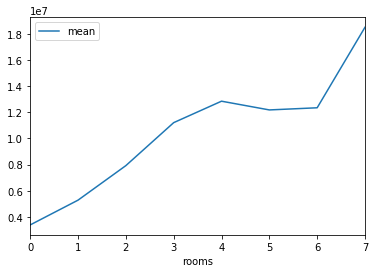

In [184]:
piter_center.groupby('rooms')['last_price'].agg(['mean']).plot()

И здесь картина в целом схожа с картиной в общей выборке: чем больше комнат, тем выше цена квартиры.

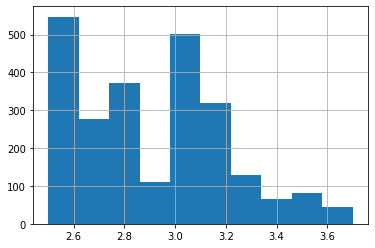

In [185]:
piter_center['ceiling_height'].hist()

Разбивка по высоте потолков выглядит так же, как и в общей выборке. В большинстве квартир потолки имеют высоту от 2,5 до 3,1 метра.

In [186]:
piter_center_corr = piter_center.pivot_table(index = 'rooms', values = ['total_area', 'ceiling_height', 'last_price'])
piter_center_corr

,ceiling_height,last_price,total_area
rooms,,,
0,2.800000,3.380000e+06,26.000000
1,2.759358,5.274419e+06,39.282834
2,2.877855,7.916088e+06,60.260381
3,2.958209,1.120303e+07,85.077353
4,3.084252,1.284362e+07,104.014252
5,3.152549,1.217547e+07,118.615686
6,2.950000,1.234020e+07,112.000000
7,3.295000,1.850000e+07,129.500000


In [187]:
piter_center_corr.corr()

,ceiling_height,last_price,total_area
ceiling_height,1.000000,0.929176,0.900502
last_price,0.929176,1.000000,0.951362
total_area,0.900502,0.951362,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69da5ea790>,
      dtype=object)

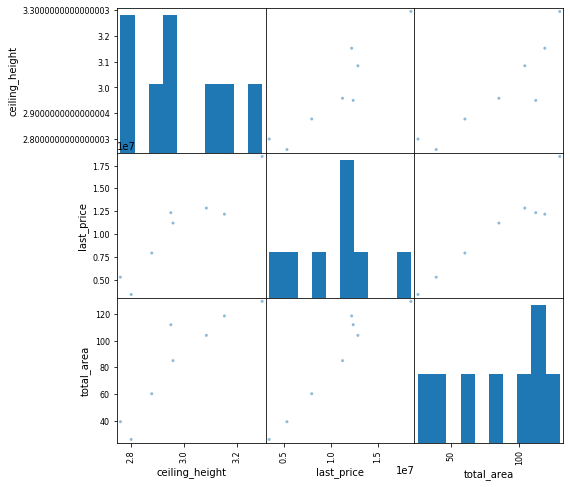

In [188]:
pd.plotting.scatter_matrix(piter_center_corr, figsize=(8,8))

В целом корреляция везде близка к единице, то есть цена устойчиво зависит и от высоты потолка, и от площади, и от числа комнат. 

In [189]:
piter_center_update = piter_center.pivot_table(index = 'price_cuts', values = ['total_area', 'ceiling_height', 'rooms'])

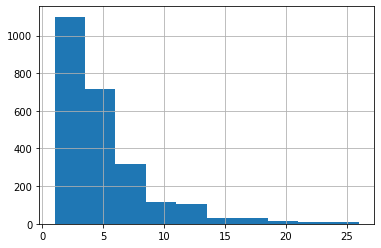

In [190]:
piter_center['floor'].hist()

In [191]:
piter_center['floor_cuts'] = pd.cut(piter_center['floor'], 10)
piter_center.groupby('floor_cuts')['last_price'].agg(['count', 'mean'])

,count,mean
floor_cuts,,
"(0.975, 3.5]",1100,8.349574e+06
"(3.5, 6.0]",844,9.107514e+06
"(6.0, 8.5]",191,1.042061e+07
"(8.5, 11.0]",149,8.675177e+06
"(11.0, 13.5]",70,8.816849e+06
"(13.5, 16.0]",40,9.607655e+06
"(16.0, 18.5]",22,8.472778e+06
"(18.5, 21.0]",22,1.120708e+07
"(21.0, 23.5]",4,7.658750e+06


In [192]:
piter_center['floor_pct'] = piter_center['floor'].rank(pct=True)

In [193]:
len(piter_center[piter_center['floor_pct'] < 0.9]) / len(piter_center)

0.8987341772151899

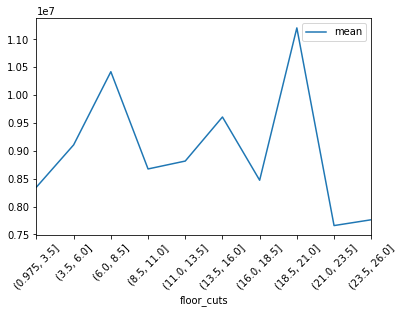

In [194]:
piter_center.groupby('floor_cuts')['last_price'].agg(['mean']).plot(rot=45)

Откровенно говоря, логики не просматривается. По аналогии с полной выборкой оценим зависимость цены от категории этажа - первый, последний или другой.

In [195]:
piter_center.groupby('floor_status')['last_price'].agg(['count', 'mean'])

,count,mean
floor_status,,
Другой,1775,9.290821e+06
Первый,262,6.531648e+06
Последний,412,8.425078e+06


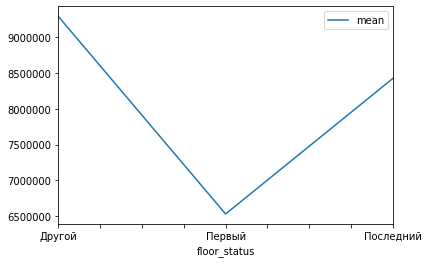

In [196]:
piter_center.groupby('floor_status')['last_price'].agg(['mean']).plot()

Точно такая же картина, как и в общей выборке. Первый этаж самый дешевый, последний дороже, но дешевле остальных вариантов.

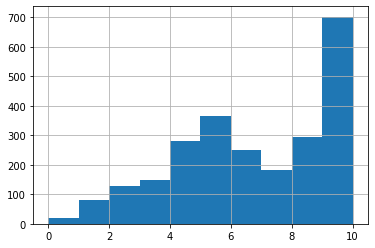

In [197]:
piter_center['distance'].hist()

На первый взгляд закономерность необычная, но все в рамках логики - в двухкилометровом радиусе от центра города федерального значения вряд ли много жилых домов, но их число растет по мере удаления от центра.

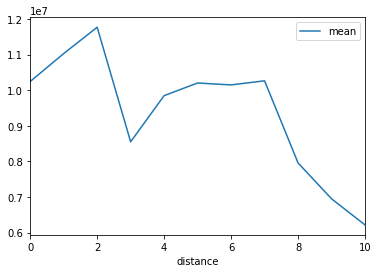

In [198]:
piter_center.groupby('distance')['last_price'].agg(['mean']).plot()

Зато цена при удалении от центра снижается. Собственно, этот график - часть графика, относящегося к полной выборке, поэтому он выглядит точно так же.

In [199]:
piter_center['day'] = piter_center['date_post'].dt.dayofweek

In [200]:
piter_center['month_number'] = piter_center['date_post'].dt.month

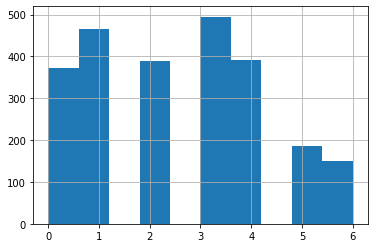

In [201]:
piter_center['day'].hist()

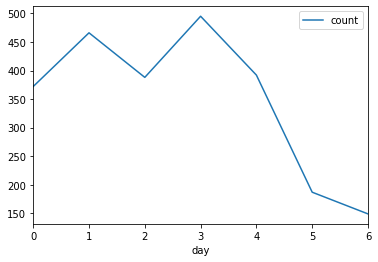

In [202]:
piter_center.groupby('day')['last_price'].agg(['count']).plot()

И здесь та же картина, как в основной выборке. Больше всего объявлений по вторникам и четвергам (правда, питерцы предпочитают четверги, а в общей выборке лидирует вторник), зато в выходные активности почти нет.

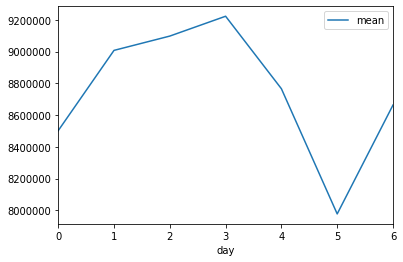

In [203]:
piter_center.groupby('day')['last_price'].agg(['mean']).plot()

Дешевле всего квартиры, выставленные на продажу в субботу. В целом снова та же картина, что и в основной выборке, только среда подтянулась поближе к своим соседям по календарю.

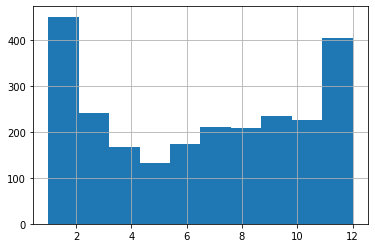

In [204]:
piter_center['month_number'].hist()

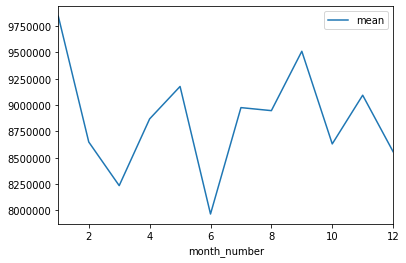

In [205]:
piter_center.groupby('month_number')['last_price'].agg(['mean']).plot()

А вот здесь интересно. В Питере гораздо чаще выставляют на продажу квартиры в декабре, чем в среднем по общей выборке, февраль лишился лидерства и приблизился к среднестатистическим значениям, зато в абсолютные лидеры вышел январь, как ни удивительно. Майское же затишье сохранилось и в питерских данных. Что касается стоимости, то тут тоже нет явной закономерности. Самые дешевые объявления публикуются в июне, самые дорогие - в январе, это повторяет график общей выборки.

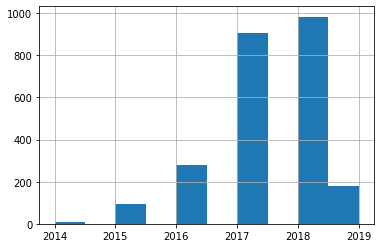

In [206]:
piter_center['year'].hist()

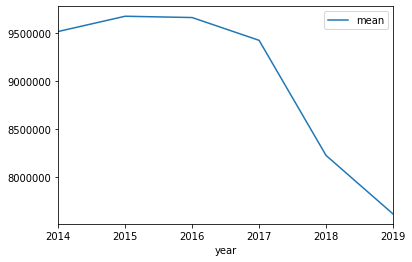

In [207]:
piter_center.groupby('year')['last_price'].agg(['mean']).plot()

In [208]:
piter_center_date = piter_center.pivot_table(index = 'day', values = ['last_price', 'month_number', 'year'])

In [209]:
piter_center_date.corr()

,last_price,month_number,year
last_price,1.000000,-0.149403,-0.068006
month_number,-0.149403,1.000000,0.379077
year,-0.068006,0.379077,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69d9d74410>,
      dtype=object)

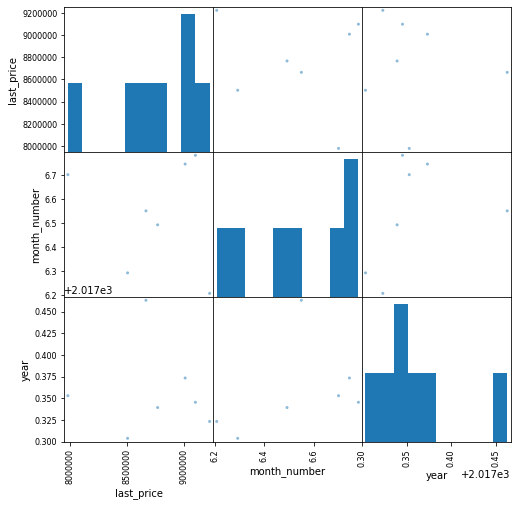

In [210]:
pd.plotting.scatter_matrix(piter_center_date, figsize=(8,8))

И здесь Питер выделяется из общей выборки. До 2017 года средняя цена практически не менялась, снижается лишь последние два года. Столица не является законодателем тенденций. 

### Шаг 5. Общий вывод

В этом проекте были изучены данные архива объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за четыре с небольшим года, а именно за период от 27.11.2014 до 03.05.2019 гг. Проведена предобработка данных (заполнены либо убраны пропуски, данные в столбцах приведены к нужному виду). Часть пропусков осталась незаполненной (39% строк в столбце «Высота потолка» - эти данные ни от чего не зависят, и восстановить их за счет данных в других столбцах не получится; пропуски в столбцах с расстояниями до центра, водоемов и аэропортов - 23%, явно технический сбой).

В таблицу добавлены столбцы «Цена кв.метра», а также «День недели», «Название месяца» и «Год» публикации объявления. Кроме того, добавлен столбец «Статус этажа» (первый, последний, другой), рассчитаны соотношения жилой и общей площадей, а также площади кухни и общей площади. 

В результате анализа выявлены следующие закономерности:
1.	Средняя цена за метр с ростом площади квартиры сперва падает, а начиная с 66 кв. м. явно растет. Таким образом, самые дешевые квадратные метры – в квартирах площадью 53-66 кв. м.
2.	В столбце «Цена» есть два явных выброса, они оба относятся к Санкт-Петербургу. Эти квартиры стоят от 111 млн. руб. Возможно, это ошибка заполнения данных в графе «Стоимость».
3.	Подавляющее число представленных в выборке квартир стоят порядка 4 - 4,5 млн. рублей, следом идут чуть более дорогие предложения - около 5,2 млн. рублей, и затем чуть дешевле - порядка 3,5 млн. рублей.
4.	Больше всего на рынке однокомнатных и двухкомнатных квартир – по 8000; трехкомнатные квартиры занимают третье место – почти 6000, реже встречаются 4-комнатные квартиры – около 1000. 
5.	Обнаружены выбросы в столбце «Высота потолка» - таковыми признаны все потолки выше 11 метров и ниже двух метров. Вероятно, такие данные получились из-за ошибочной постановки десятичной запятой.
6.	У большинства квартир высота потолка в пределах 2,6 м, а разумные пределы высоты укладываются в диапазоне до 3,4 - 3,6 м.
7.	Обнаружены выбросы в столбце «Срок продажи». Из дальнейшего анализа были исключены объявления со сроком размещения более 1100 дней (три года). Это менее 3% от выборки.
8.	Большинство квартир продается в течение квартала, это выглядит вполне логичным. Если не уложились в квартал, то в полгода тоже много предложений реализуются. Следующие градации - три квартала и год. Если квартира висит в продаже больше года, это повод серьезно пересмотреть объявление.
9.	Итак, основная масса продаж приходится на 40-60-й день с момента публикации объявления, то есть на второй месяц. Но также довольно много продаж в первый месяц и даже в первую неделю. Этот период можно считать периодом быстрых продаж недвижимости.
10.	Также в пяти объявлениях была указана нулевая общая этажность дома, несмотря на то, что среди этих квартир есть квартиры на восьмом и даже 21-м этаже. Восстановить такие пропуски не представляется возможным, из дальнейшей обработки они были исключены.
11.	Гистограмма количества комнат показывает, что количество студий настолько мало, что может считаться выбросом. Несмотря на крайне малое количество студий в выборке, есть вероятность, что закономерности продаж студий могут отличаться от закономерностей продаж квартир. Возможно, студии заслуживают отдельного исследования, но уже в масштабах страны, чтобы выборка была больше.
12.	Цена квартиры прямо зависит от количества комнат. Между пяти- и шестикомнатными квартирами почти равенство, а дальше скачок, который можно интерпретировать по-разному. Если считать семикомнатные и дальше квартиры выбросом, то рост цены квартиры замедляется с ростом комнатности. Если нет, то можно сделать предположение о скачкообразности дальнейшего роста, но для подкрепления этого вывода не хватает выборки: в нашей есть максимум семикомнатные квартиры, и их всего две.
13.	У пятикомнатных квартир самая низкая цена квадратного метра. Общая цена квартиры растет в зависимости от числа комнат, а цена метра достигает наивысших значений в случае студий и шестикомнатных квартир – порядка 102 тысяч, а в целом неуклонно снижается в пределах от одной до пяти комнат, за исключением четырехкомнатных.
14.	Много квартир в пределах 20 км от центра, еще чуть-чуть в радиусе 40 км, затем малое количество между 50 и 60 км. В зависимости от удаленности от центра цена за метр снижается даже более ровно, чем общая цена квартиры.
15.	Самые дешевые квартиры на первых этажах (в среднем 4,4 млн), чуть дороже - на последних (в среднем 5,3 млн), самые дорогие – между ними (в среднем 5,9млн).
16.	Больше всего объявлений публикуется по вторникам и четвергам, меньше всего - по выходным. Вероятно, это связано с тем, что по выходным большинство агентств недвижимости не работает. Вобъявлениях, опубликованных в выходные, еще и средняя цена ниже – в среднем на 350 000 рублей. Если верно предположение о том, что в выходные объявления публикуют в основном частные лица, то в таких объявлениях цена ближе к реальной, поскольку агентства и риелторы включают в цену агентскую комиссию - она примерно 300-400 тыс. и составляет.
17.	Чаще всего объявления о продаже квартиры публикуются в самом коротком месяце года – феврале. Меньше всего объявлений в декабре и самых праздничных месяцах – январе и мае.
18.	Самая высокая цена на квартиры - в январе, самая низкая в марте. При этом явной зависимости цены от месяца публикации объявления, скорее всего, нет.
19.	Из 2014 года в подборку попало два месяца, поэтому и объявлений мало – 27. За 2019 год в подборке уже пять месяцев, поэтому объявлений тоже меньше тысячи (796). А вот провал в 2015 году (303 объявления) удивителен.
20.	Цена на недвижимость уверенно снижается год от года и только в 2019 году вернулась в рост. Самые низкие цены на недвижимость были в 2018 году – около 5,3 млн. руб. В то же время было выложено наибольшее количество объявлений – почти 5 000.
21.	Среди топ-10 населенных пунктов по числу объявлений Санкт-Петербург лидирует с большим отрывом, в 36 раз больше объявлений, чем у следующего в списке Всеволожска. По средней стоимости метра лидирует также Северная столица (110 тыс. руб), а вот на втором месте не Всеволожск, а Пушкин (100 тыс.). У Всеволожска самый дешевый метр из всей топ-десятки населенных пунктов по числу объявлений (66 тыс. руб).
22.	В общей выборке самый дорогой метр оказался в Зеленогорске – 118 тыс.руб (там 16 объявлений). Самый дешевый метр в населенных пунктах Житково, Фалилеево, Ефимовском, Совхозном и Вахновой Каре - цена не превышает 16 000 рублей. Эти населенные пункты представлены в почти пятилетней выборке всего одним объявлением каждое. Для справки, в 2014 году население Вахновой Кары составляло 330 человек, это вполне объясняет и стоимость метра, и количество объявлений.
23.	С удалением от центра города первое падение цены как общей, так и за квадрат происходит на отметке 3 км от центра, но графики быстро выравниваются. А вот от 7 до 10 км от центра цена стремительно падает вниз, особенно явно это видно на графике полной цены. Здесь был обнаружен и удален выброс – резкий скачок на 27-м километре – там ровно одно предложение. 
24.	За пределами 10-км радиуса цена квадрата не превышает 110 тыс.руб. Таким образом, центральной частью города можно признать зону в пределах 10 км от центра.
25.	Зависимость стоимости квартиры от площади для Санкт-Петербурга имеет такой же характер, что и в целом по выборке. Если в целом стоимость квартиры неуклонно растет с ростом площади, то цена метра для маленьких квартир существенно выше среднестатистической (153 000 р), затем резко падает к среднестатистическим значениям (120-125 000 р) и медленно растет вместе с ростом площади до 121 метра, после чего рост резко ускоряется.
26.	Аналогично с числом комнат: чем их больше, тем выше стоимость квартиры. 
27.	Разбивка по высоте потолков для Питера выглядит так же, как и в общей выборке. В большинстве квартир потолки имеют высоту от 2,5 до 3,1 метра.
28.	В целом корреляция везде близка к единице, то есть цена устойчиво прямо зависит и от высоты потолка, и от площади, и от числа комнат.
29.	Зависимость от статуса этажа в Петербурге также повторяет общую зависимость по выборке. Первый этаж самый дешевый, последний дороже, но дешевле остальных вариантов.
30.	В двухкилометровом радиусе от центра города федерального значения мало объявлений, но их число растет по мере удаления от центра. Зато цена при удалении от центра снижается. Этот график является частью графика по общей выборке.
31.	Зависимость от дней недели такая же, как в общей выборке. Больше всего объявлений по вторникам и четвергам (правда, питерцы предпочитают четверги, а в общей выборке лидирует вторник), зато в выходные активности почти нет. 
32.	Дешевле всего квартиры, выставленные на продажу в субботу. В целом снова та же картина, что и в основной выборке, только в Петербурге среда подтянулась поближе к своим соседям по календарю (в общей выборке она несколько проседает по стоимости).
33.	В Питере гораздо чаще выставляют на продажу квартиры в декабре, чем в среднем по общей выборке, февраль лишился лидерства и приблизился к среднестатистическим значениям, зато в абсолютные лидеры вышел январь, как ни удивительно. Майское же затишье сохранилось и в питерских данных. Что касается стоимости, то тут тоже нет явной закономерности. Самые дешевые объявления публикуются в июне, самые дорогие - в январе, это повторяет гистограмму общей выборки.
34.	До 2017 года средняя цена в Петербурге практически не менялась, снижается лишь последние два года, в отличие от общей выборки. Столица не является законодателем тенденций.
